# Zillow Home Value Price Growth Analysis

In [1]:
#import dependencies 
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import mlab
import numpy as np
import random

In [2]:
#set path
filepath = "CSV/Neighborhood_zhvi_uc_sfr_sm_sa_month.csv"
house=pd.read_csv(filepath)

In [3]:
#drop columns
house = house.drop(["RegionID", "SizeRank", "StateName", "Metro"], axis=1)

In [4]:
#Find total null values
house.isnull().values.sum()

1356132

### Measure Rates of Change for Price Growth

In [26]:
#Create New Columns for Rate of Change
house["Rate of Change 10year"]=((house["2024-05-31"]-house["2014-05-31"])/house["2014-05-31"]*100)
house["Rate of Change 5year"]=((house["2024-05-31"]-house["2019-05-31"])/house["2019-05-31"]*100)
house["Rate of Change 3year"]=((house["2024-05-31"]-house["2021-05-31"])/house["2021-05-31"]*100)

In [27]:
house.head()

,RegionName,RegionType,State,City,CountyName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2023-11-30,2023-12-31,2024-01-31,2024-02-29,2024-03-31,2024-04-30,2024-05-31,Rate of Change 10year,Rate of Change 5year,Rate of Change 3year
0,Maryvale,neighborhood,AZ,Phoenix,Maricopa County,7.488183e+04,7.513189e+04,7.546240e+04,7.615475e+04,7.690971e+04,...,3.399542e+05,3.415292e+05,3.425380e+05,3.435410e+05,3.450148e+05,3.468497e+05,3.483078e+05,226.606298,76.416379,28.677186
1,Paradise,neighborhood,NV,Las Vegas,Clark County,1.540811e+05,1.540653e+05,1.543658e+05,1.550256e+05,1.558892e+05,...,4.223454e+05,4.246922e+05,4.267592e+05,4.288717e+05,4.312126e+05,4.342951e+05,4.375006e+05,134.728340,47.793215,27.192420
2,Upper West Side,neighborhood,NY,New York,New York County,NaN,NaN,NaN,NaN,NaN,...,2.872937e+06,2.824420e+06,2.786026e+06,2.755854e+06,2.742297e+06,2.730449e+06,2.722321e+06,5.295910,-15.067137,0.839075
3,Upper East Side,neighborhood,NY,New York,New York County,3.083477e+06,3.070016e+06,3.067172e+06,3.056943e+06,3.035549e+06,...,4.245297e+06,4.192593e+06,4.147253e+06,4.105949e+06,4.069754e+06,4.035867e+06,4.002782e+06,-29.127149,-28.925670,-12.943633
4,South Los Angeles,neighborhood,CA,Los Angeles,Los Angeles County,1.326032e+05,1.327325e+05,1.330733e+05,1.338500e+05,1.348933e+05,...,7.090138e+05,7.131496e+05,7.107782e+05,7.042357e+05,6.975498e+05,6.951340e+05,6.951850e+05,148.078749,40.350251,14.153113


In [41]:
#Number of unique cities in df
len(house['City'].unique())

1188

In [28]:
#Plotting all Neighborhoods based on 5 Year Rate of Change
alldf=house[['RegionName', 'City', 'State','Rate of Change 5year']].sort_values(by=('Rate of Change 5year'), ascending=False)

In [29]:
#Clear Null values
alldf=alldf.dropna()

In [31]:
#Assign x and y axes
x_all=alldf['RegionName']
y_all=alldf['Rate of Change 5year']

In [32]:
#show basic stats
alldf.describe()

,Rate of Change 5year
count,21928.000000
mean,52.160823
std,21.611497
min,-44.218375
25%,39.501620
50%,51.927311
75%,64.714391
max,211.883294


### Divide Data into Percentiles

In [33]:
#Percentiles
stats=np.percentile(y_all,range(0,125,25)) #use nunmpy to calculate percentile cutoffs
min=stats[0]
pct25=stats[1]
mean_all=np.mean(y_all)
med_all=np.median(y_all)
pct75=stats[3]
max=stats[4]

for i in stats:
    print(i)

-44.21837537379134
39.50161988390213
51.927311070468704
64.71439066069941
211.88329366932277


In [34]:
#Percentiles function
def percentiles(y):

    #make a list for each percentile
    tile75 = []
    tile50 = []
    tile25 = []
    tileneg = [] #negative values

    #categorize values into percentiles
    for i in y:
        if i <= max and i > pct75:
            tile75.append(i)
        if i<= pct75 and i>pct25:
            tile50.append(i)
        if i<= pct25 and i>min:
            tile25.append(i)
        if i < 0:
            tileneg.append(i)
    
    tiles=[tile75, tile50, tile25, tileneg]

    #print number of values in each percentile
    for t in tiles:
        print(len(t))

In [35]:
#categorize neighborhood growth values into percentiles
percentiles(y_all)

5482
10964
5481
205


In [36]:
styles = plt.style.available
print(styles)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


### Growth Rate Performance of All Neighborhoods

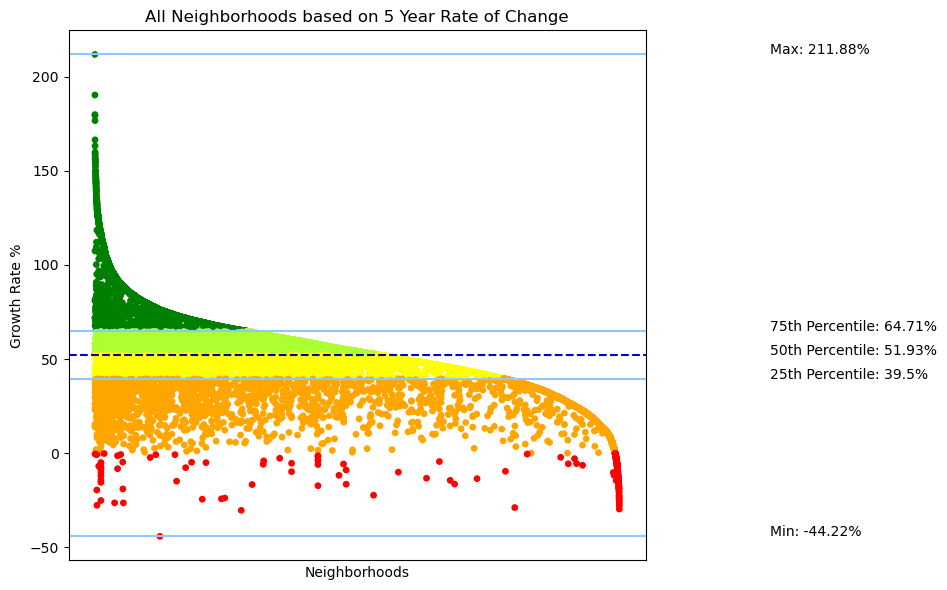

In [37]:
#Scatterplot for all neighborhoods
def plot_all_n():
    plt.figure(figsize = (10, 6))  
    
    #Colorcode data points
    conditions  = [ (y_all<=max) & (y_all>pct75), (y_all<=pct75) & (y_all>mean_all), (y_all<=mean_all) & (y_all>pct25), (y_all<=pct25) & (y_all>0), y_all<=0 ]
    choices     = [ 'green', 'greenyellow', 'yellow', 'orange', 'red' ]
    #choices     = [ 5,4,3,2,1 ]
    colorall = np.select(conditions, choices, default=np.nan)
    
    #Plot Neighborhoods
    plt.scatter( x_all, y_all, marker = 'o', s = 15, c = colorall) 
    
    #Plot Percentile Lines
    minl = plt.axhline(y=min)
    plt.text(len(x_all)-10, min, f'Min: {round(min,2)}%', fontsize = 10)
    
    pct25l = plt.axhline(y=pct25)
    plt.text(len(x_all), pct25, f'25th Percentile: {round(pct25,2)}%', fontsize = 10)
    
    meanl = plt.axhline(y=mean_all, ls='--', color = 'mediumblue')
    plt.text(len(x_all), med_all, f'50th Percentile: {round(med_all,2)}%', fontsize = 10)
    
    pct75l = plt.axhline(y=pct75)
    plt.text(len(x_all), pct75, f'75th Percentile: {round(pct75,2)}%', fontsize = 10)
    
    maxl = plt.axhline(y=max)
    plt.text(len(x_all), max, f'Max: {round(max,2)}%', fontsize = 10)
    
    #Plot labels
    plt.xticks([], rotation = 90)
    plt.title("All Neighborhoods based on 5 Year Rate of Change")
    plt.ylabel("Growth Rate %")
    plt.xlabel("Neighborhoods")
    
    plt.tight_layout()
    plt.savefig('Output Plots/All Neighborhoods 5 year ROC')
    plt.show()

with plt.style.context('seaborn-v0_8-pastel'):
        plot_all_n()

### Growth Rate Performance of Top 50 Neighborhoods

In [42]:
#Top 50 neighborhoods
plotdf=alldf.head(50)

In [43]:
#Percentiles with pandas
plotdf.describe()

,Rate of Change 5year
count,50.000000
mean,152.276255
std,14.357613
min,136.810461
25%,143.477468
50%,148.704753
75%,155.833542
max,211.883294


In [46]:
#Or numpy
np.percentile((plotdf['Rate of Change 5year']), range(0,125,25))

array([136.81046073, 143.47746837, 148.7047529 , 155.83354225,
       211.88329367])

In [47]:
#Assign x and y axes

x_axis=plotdf['RegionName']
y_axis=plotdf['Rate of Change 5year']

In [48]:
#Find Median
median=y_axis.median()

#Find Mean
mean=y_axis.mean()
mean

152.27625458131013

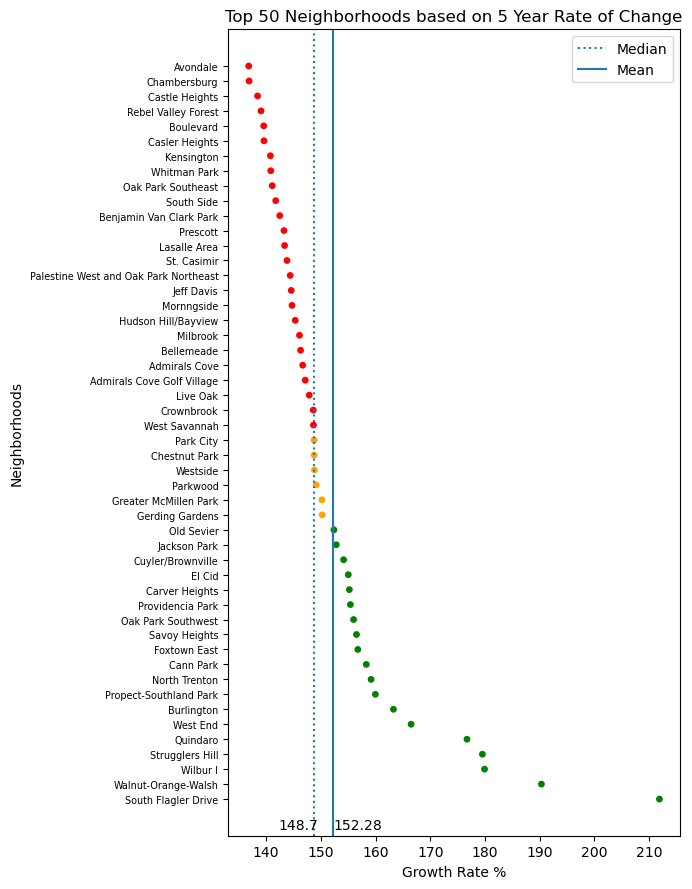

In [49]:
#Top 50 plot

def plot_top_50():
    plt.figure(figsize = (7, 9))  
    
    #Color code data points
    conditions  = [ y_axis >= mean, (y_axis<mean) & (y_axis>median), y_axis <= median ]
    choices     = [ 'green', 'orange', 'red' ]
        
    color = np.select(conditions, choices, default=np.nan)
    
    #Plot Neighborhoods
    plt.scatter( y_axis, x_axis, marker = 'o', s = 15, color = color) 
    
    #Plot Median Line
    m1 = plt.axvline(x=np.median(y_axis), ls=':')
    plt.text(median-6.5, -2, str(round(median,2)), fontsize = 10)
    
    #Plot Mean Line
    m2 = plt.axvline(x=np.mean(y_axis))
    plt.text(mean, -2, str(round(mean,2)), fontsize = 10)
    
    plt.legend([m1,m2],['Median', 'Mean'],loc = "upper right",fontsize = "medium",fancybox = True)
    plt.title("Top 50 Neighborhoods based on 5 Year Rate of Change")
    plt.ylabel("Neighborhoods")
    plt.yticks(fontfamily='sans-serif', fontsize='x-small')
    plt.xlabel("Growth Rate %")

    plt.tight_layout()
    plt.savefig('Output Plots/Top 50 Neighborhoods scatterplot')
    plt.show()

plot_top_50()

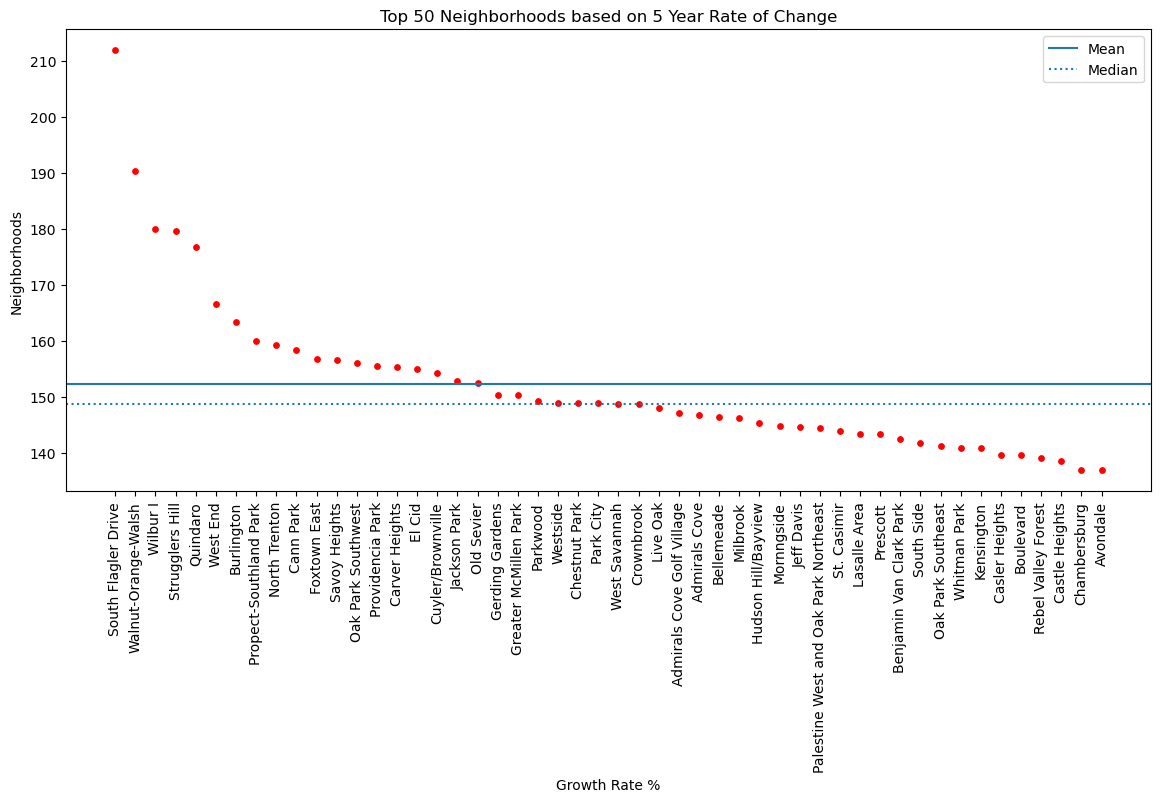

In [50]:
#HORIZONTAL CHART

#Chart Size
plt.figure(figsize = (14, 6))  

#Plot Neighborhoods
plt.scatter( x_axis, y_axis, marker = 'o', s = 15, color = 'red') 

#Plot Median Line
m1 = plt.axhline(y=np.median(y_axis), ls=':')

#Plot Mean Line
m2 = plt.axhline(y=np.mean(y_axis))

#Legend
plt.legend([m2, m1],['Mean','Median'],loc = "upper right",fontsize = "medium",fancybox = True)

plt.xticks(rotation = 90)
plt.title("Top 50 Neighborhoods based on 5 Year Rate of Change")
plt.ylabel("Neighborhoods")
plt.xlabel("Growth Rate %")
plt.show()

### Testing Function to Plot Performance of Neighborhoods per State

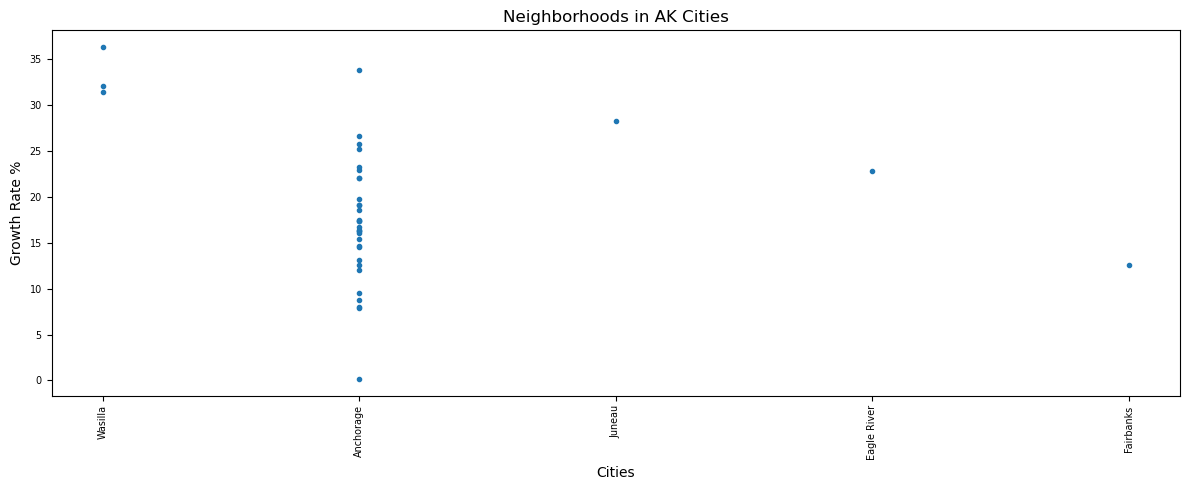

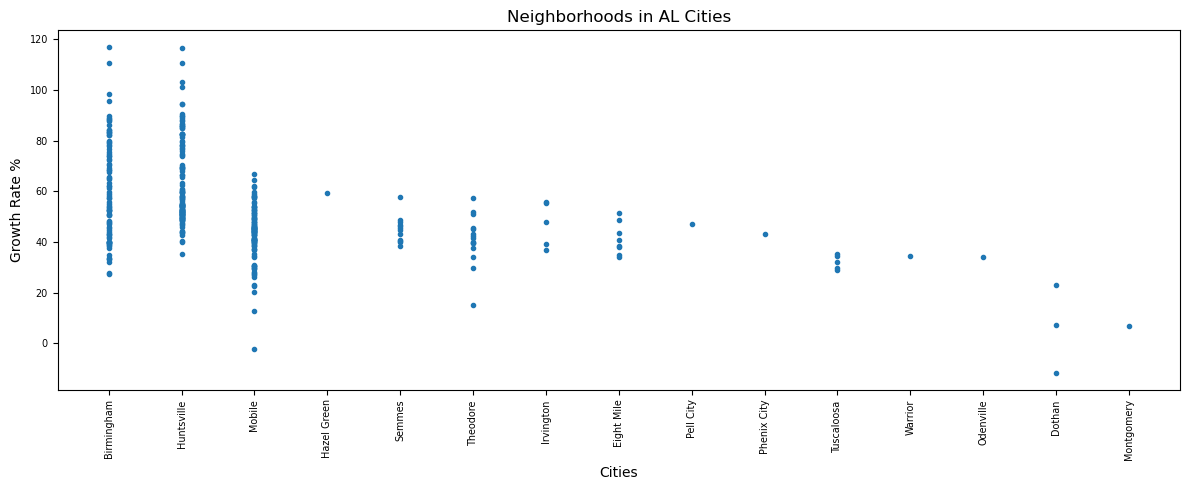

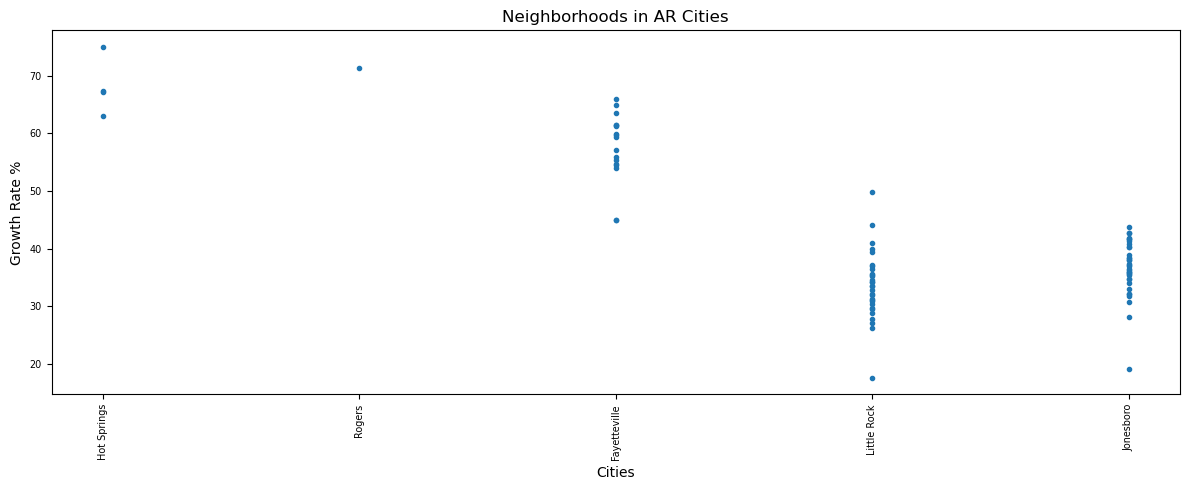

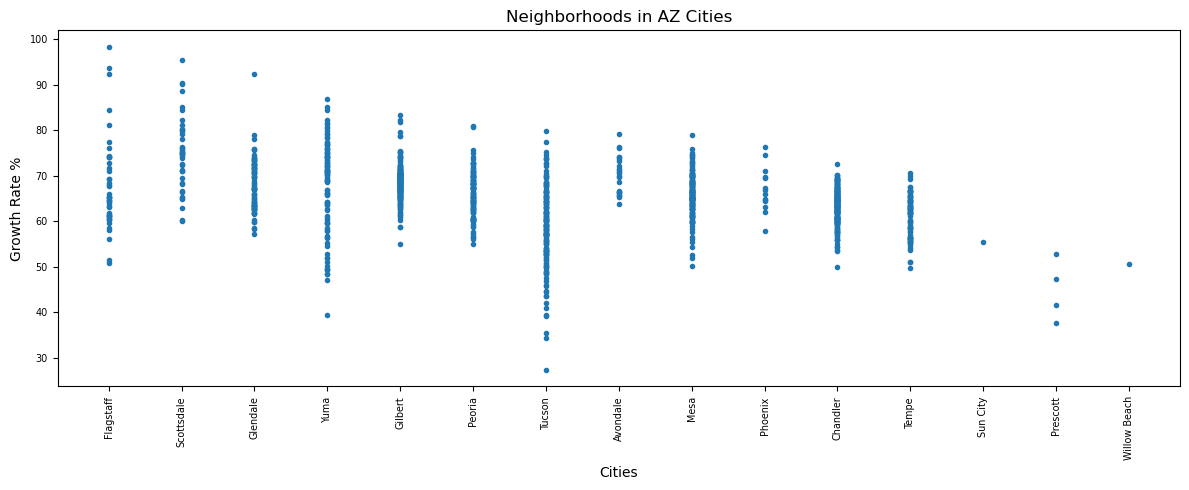

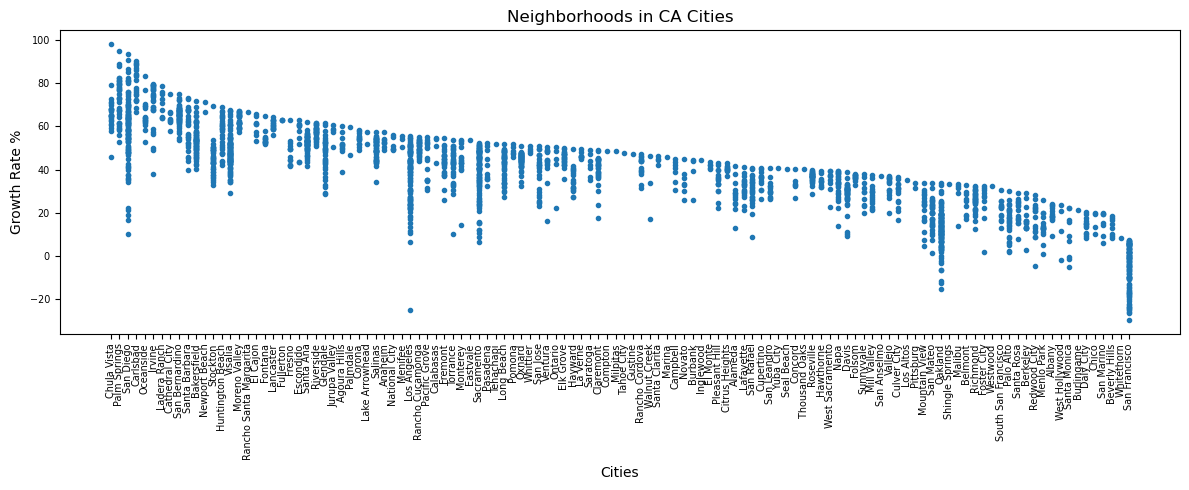

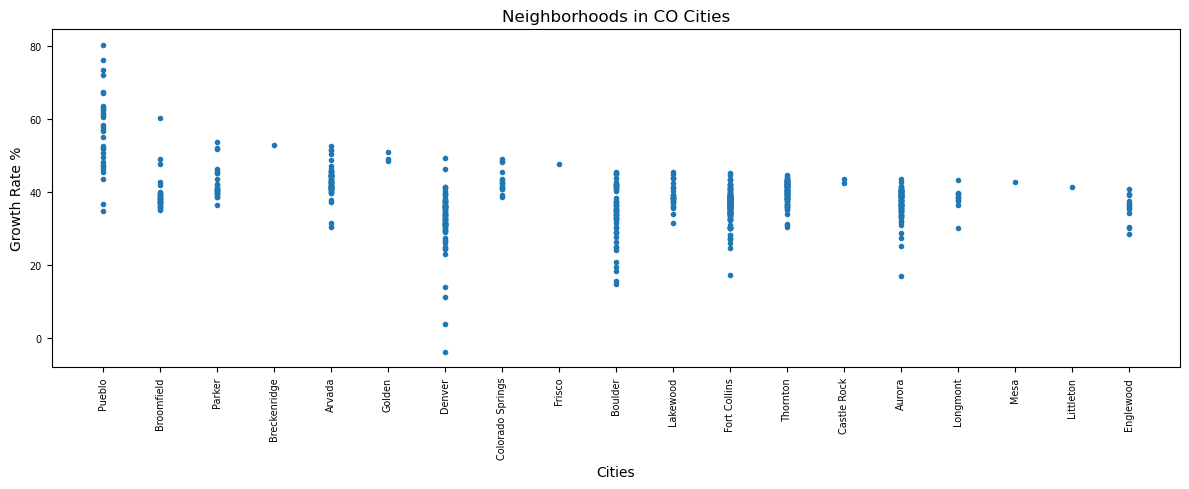

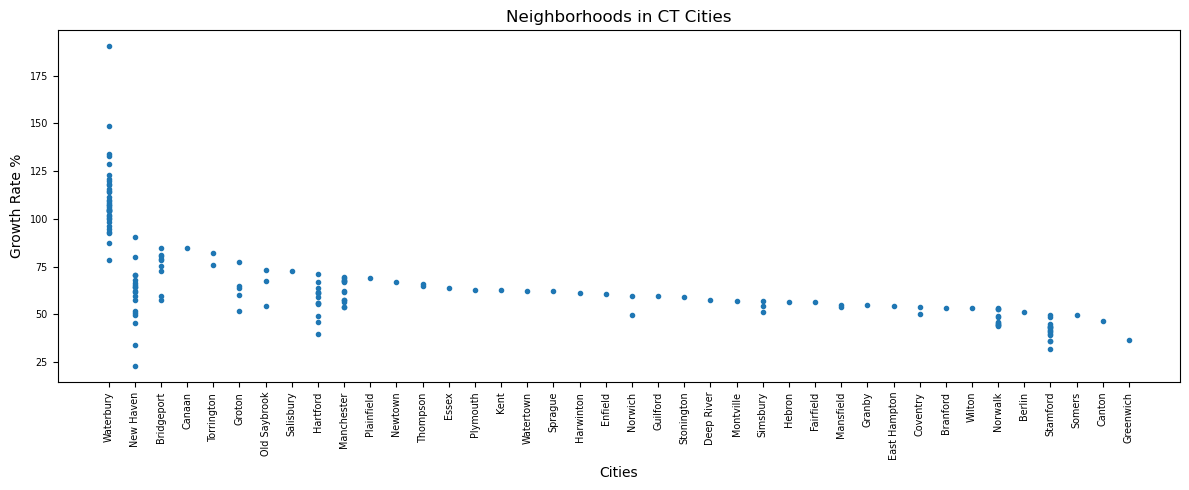

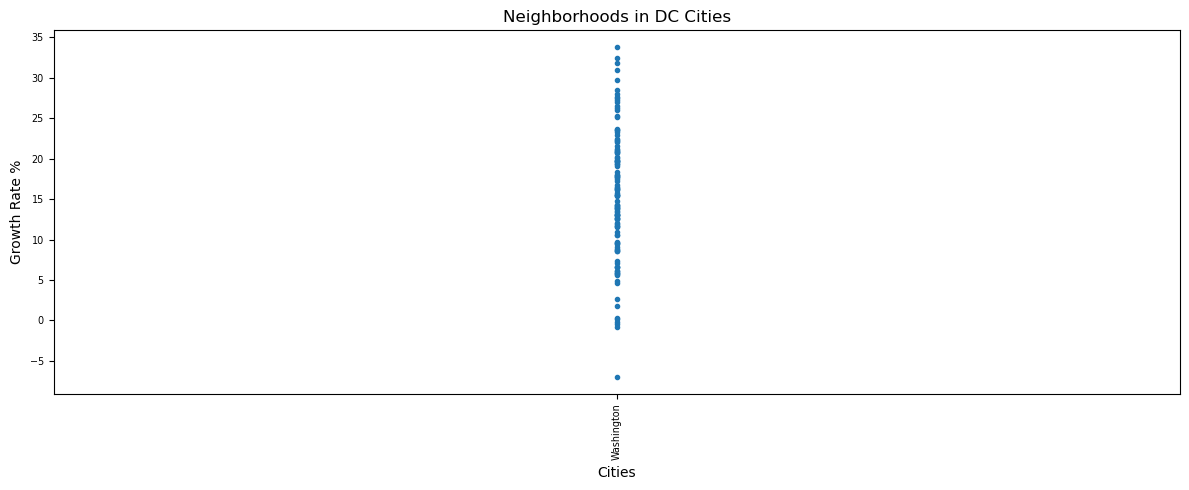

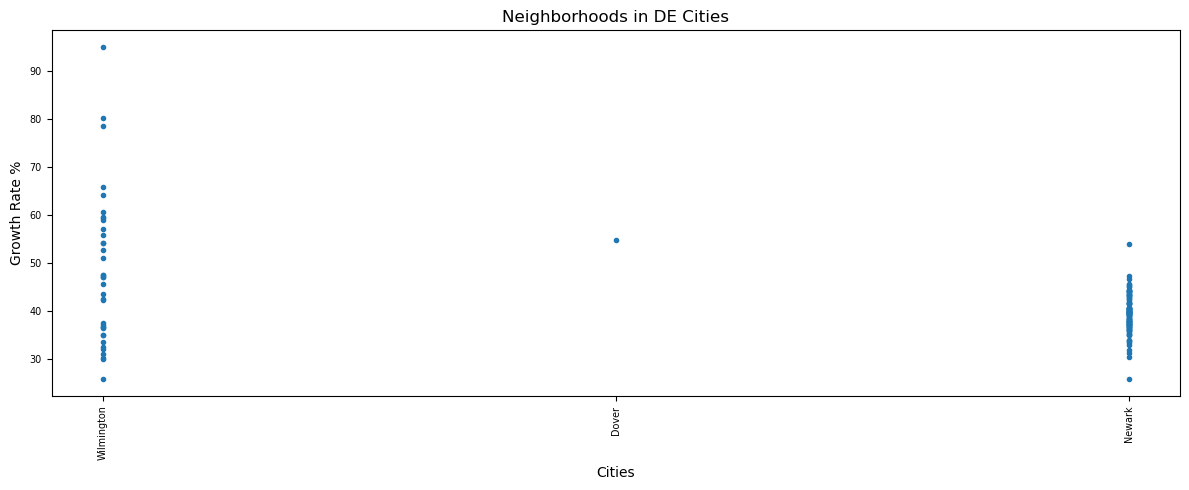

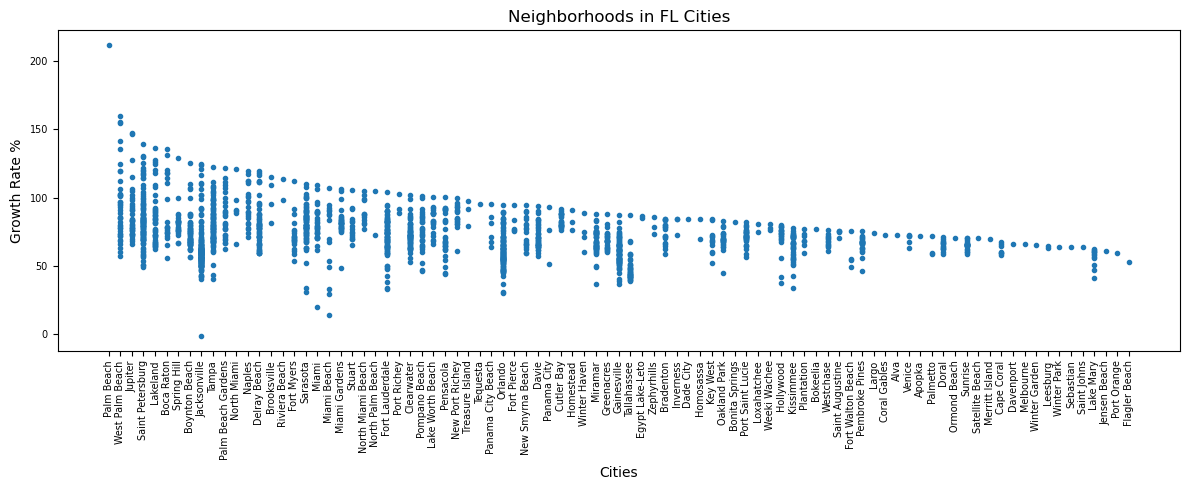

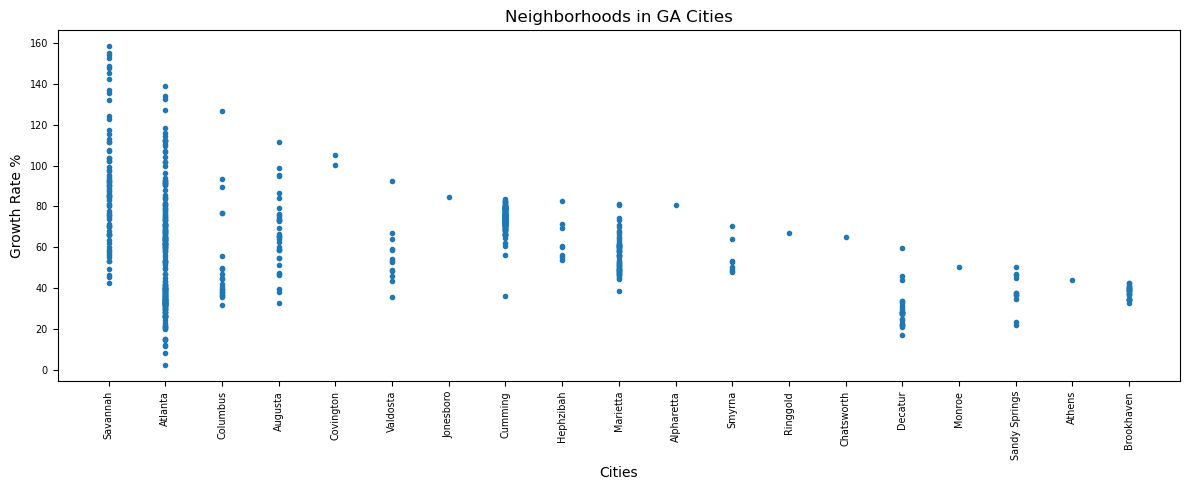

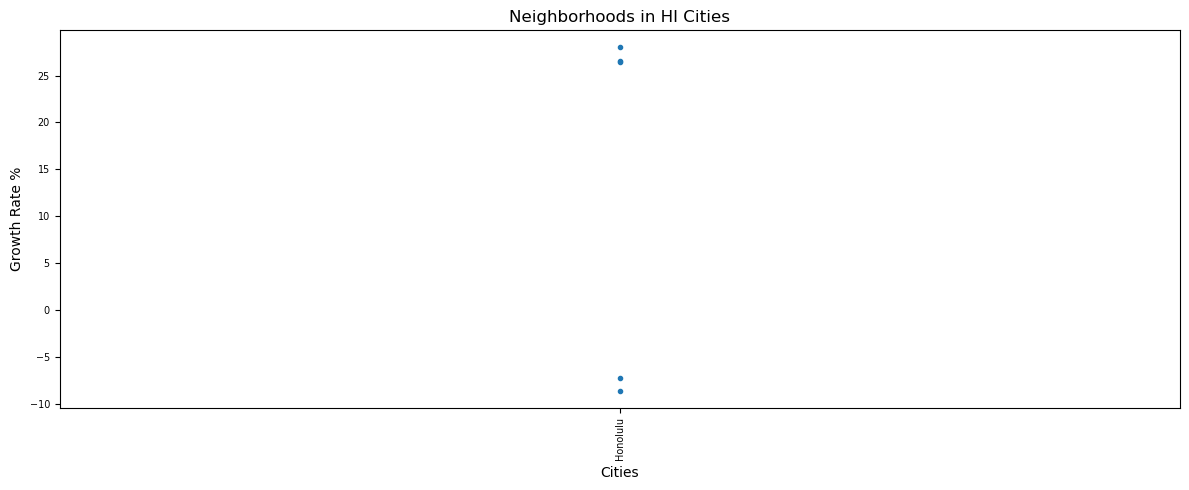

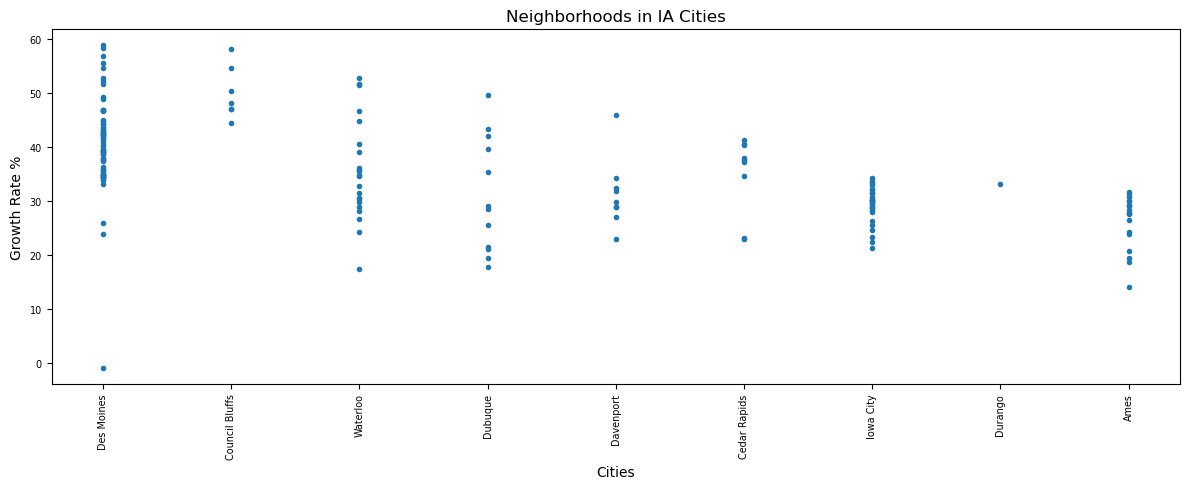

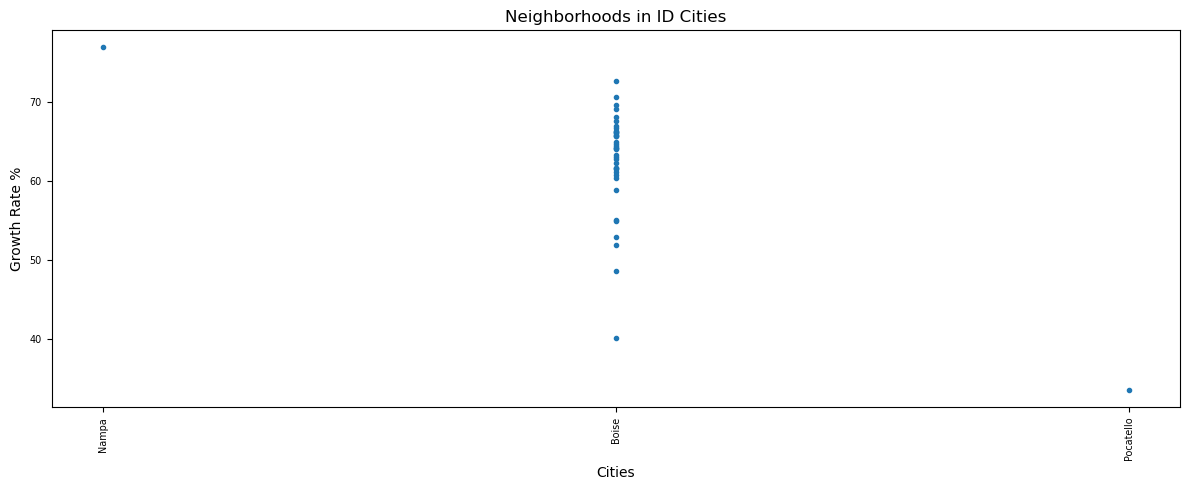

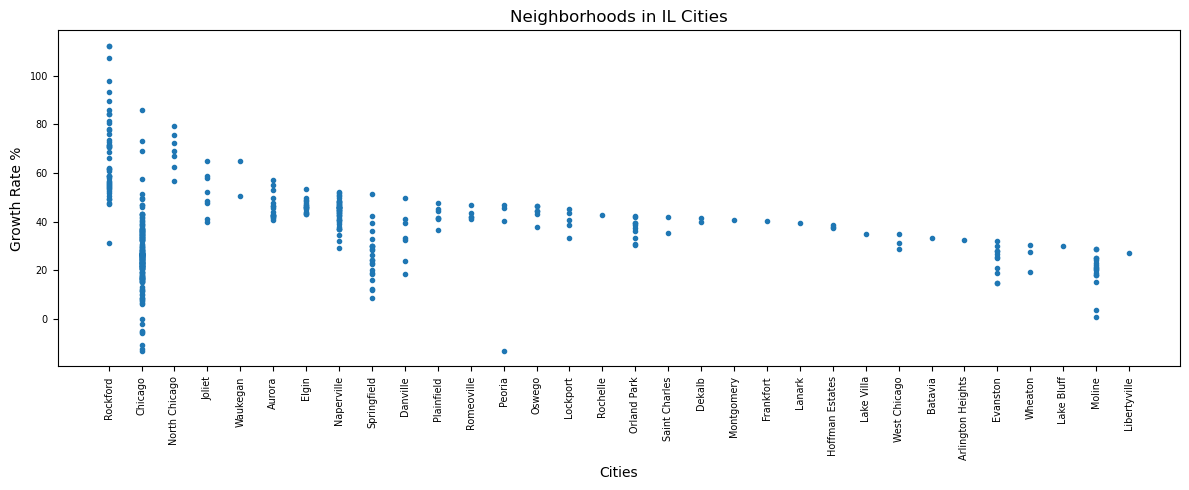

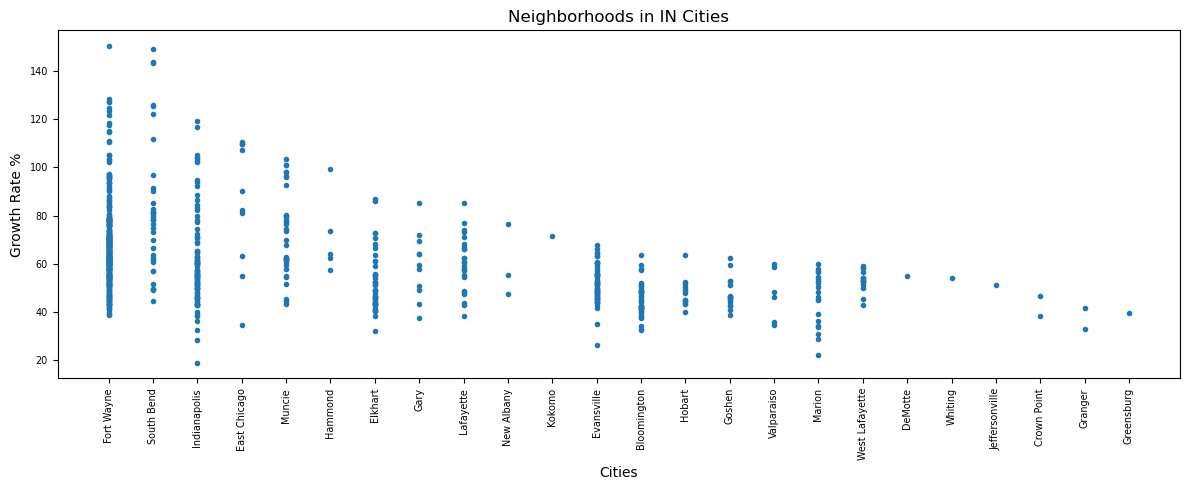

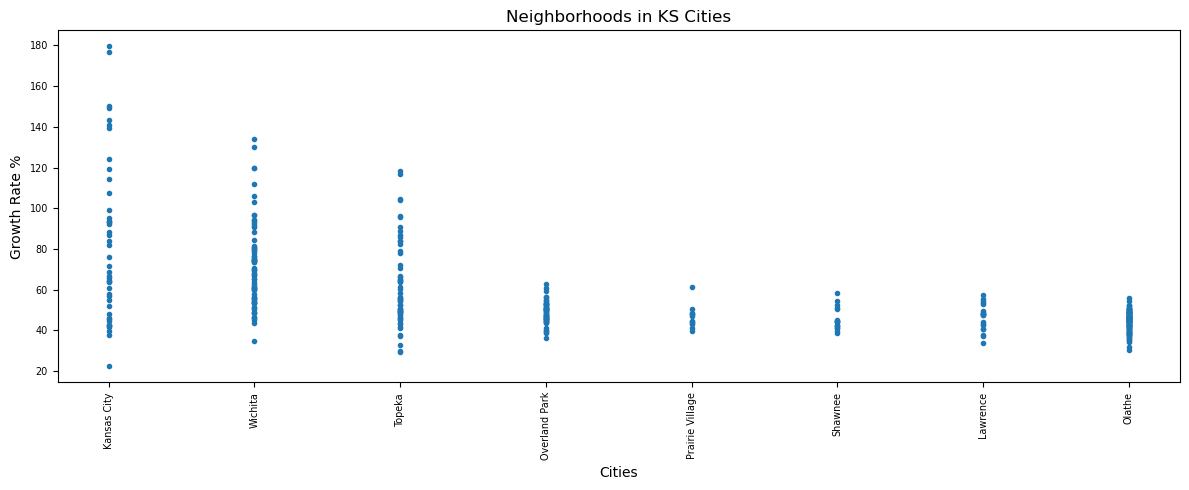

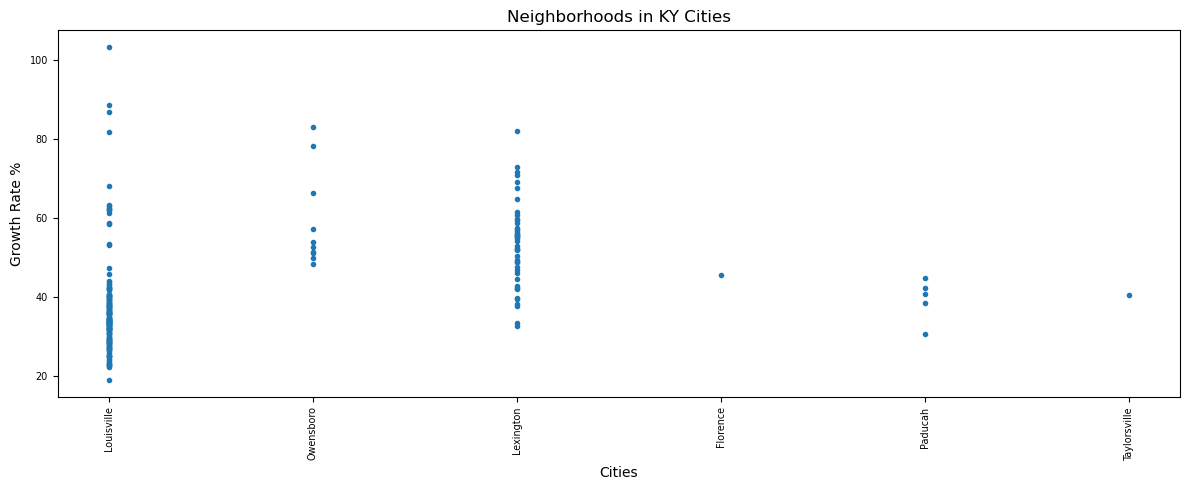

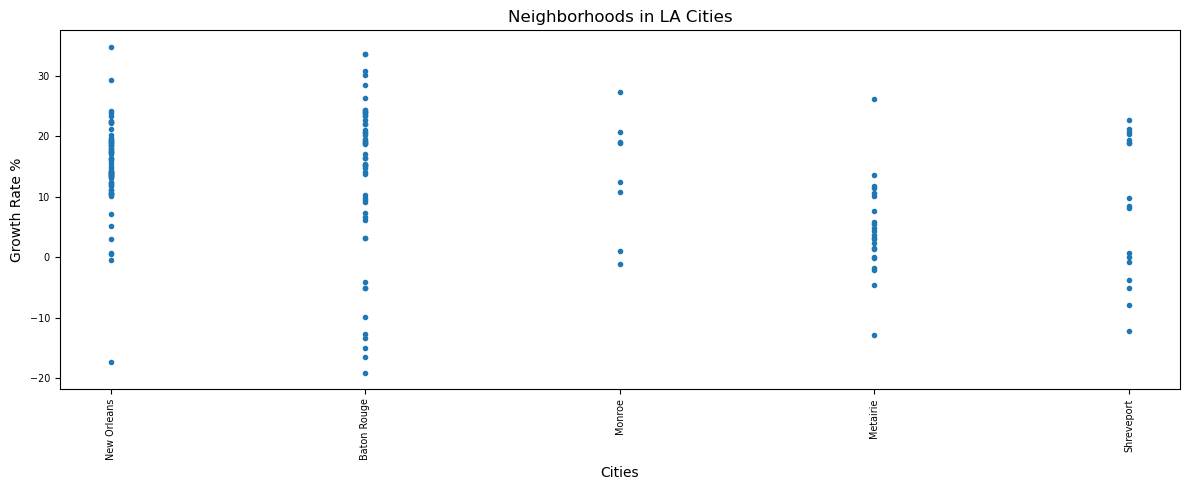

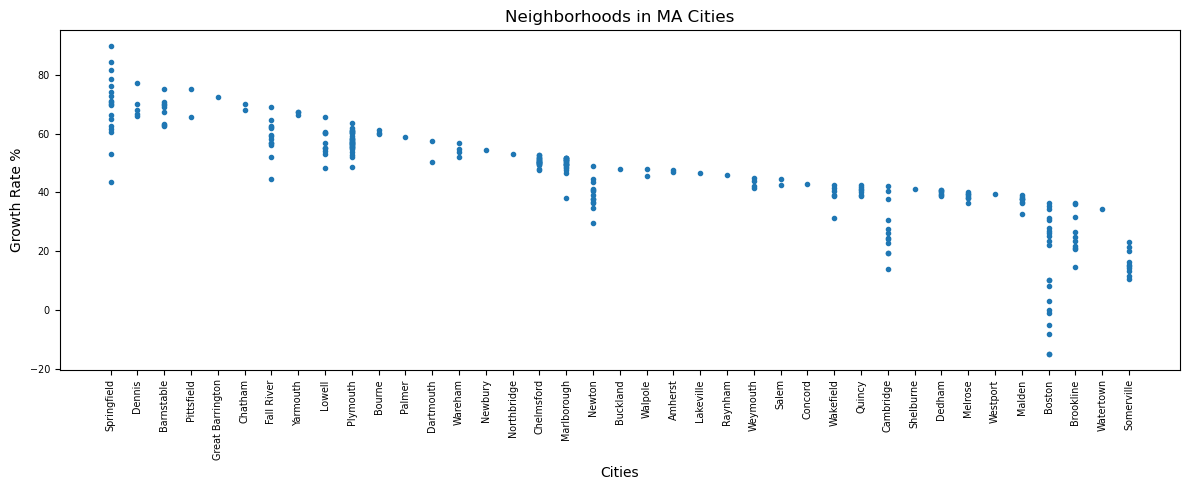

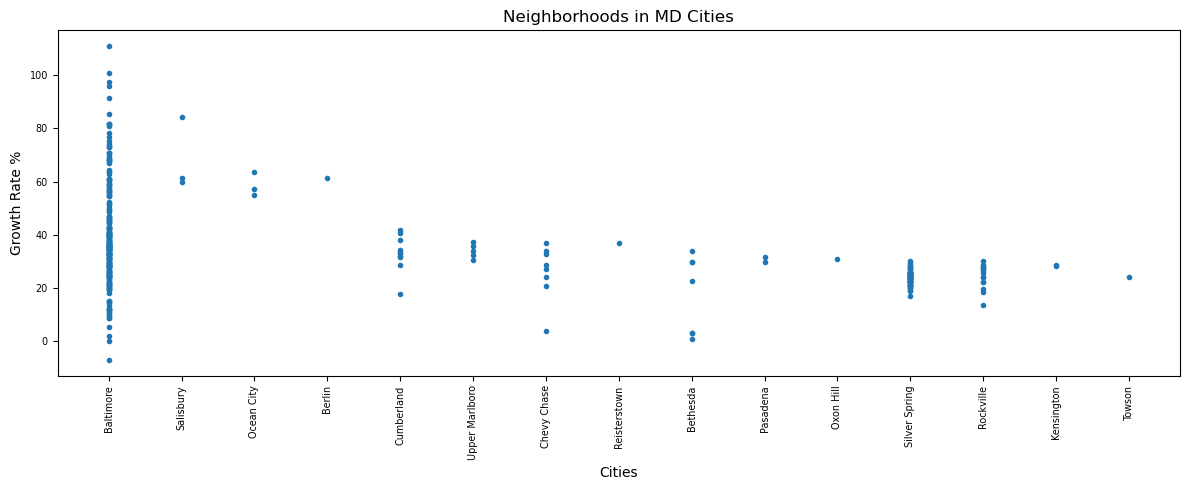

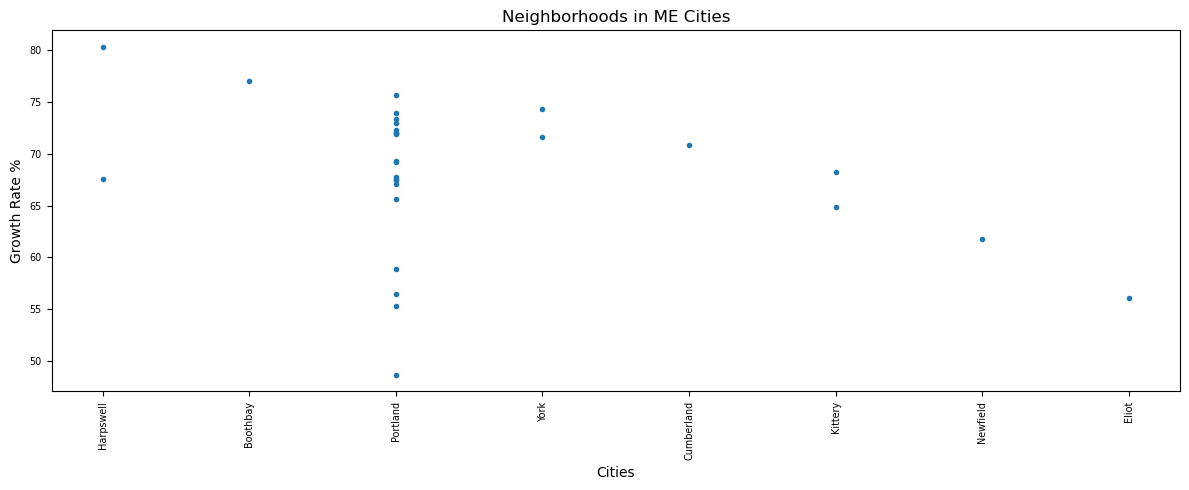

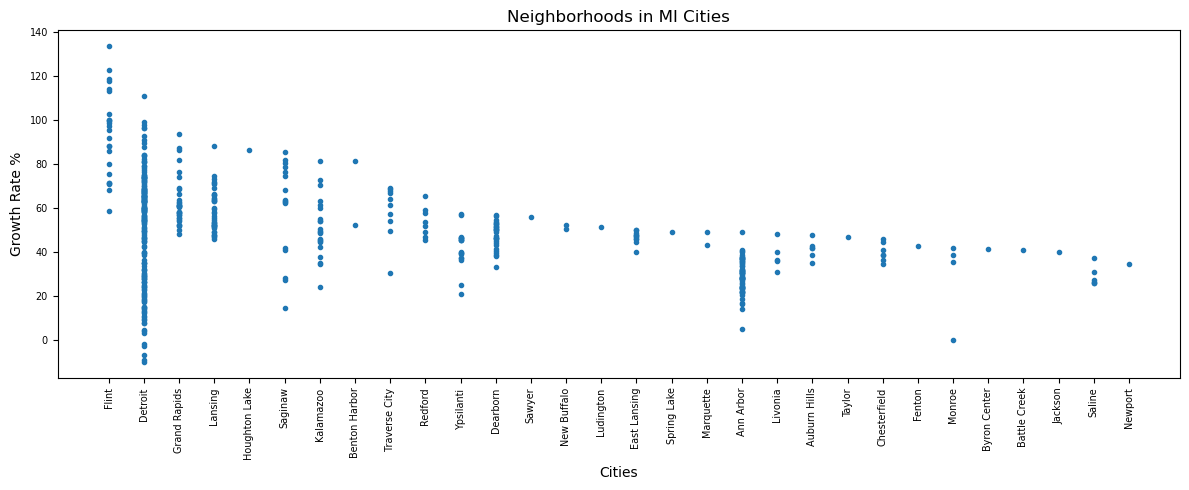

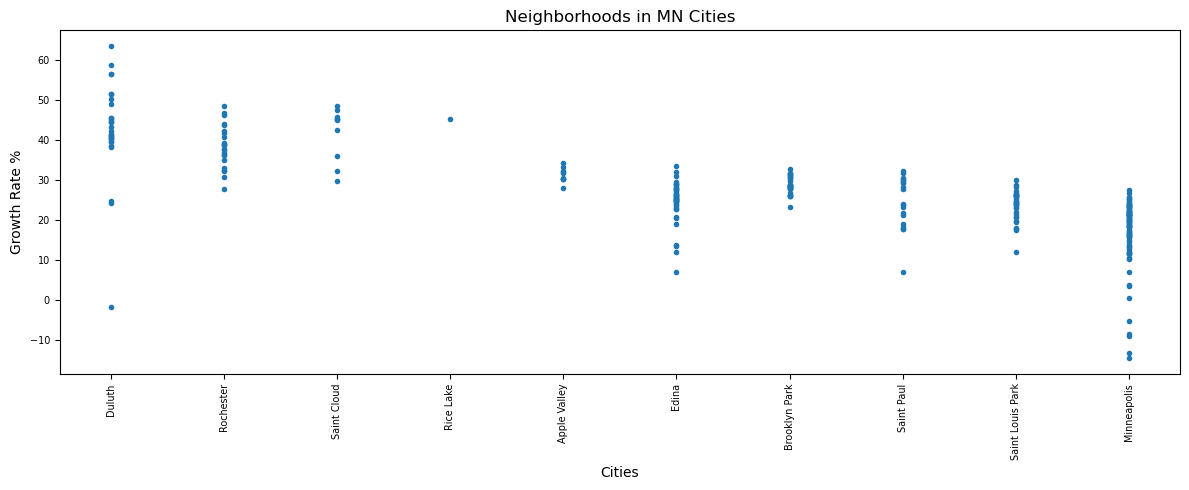

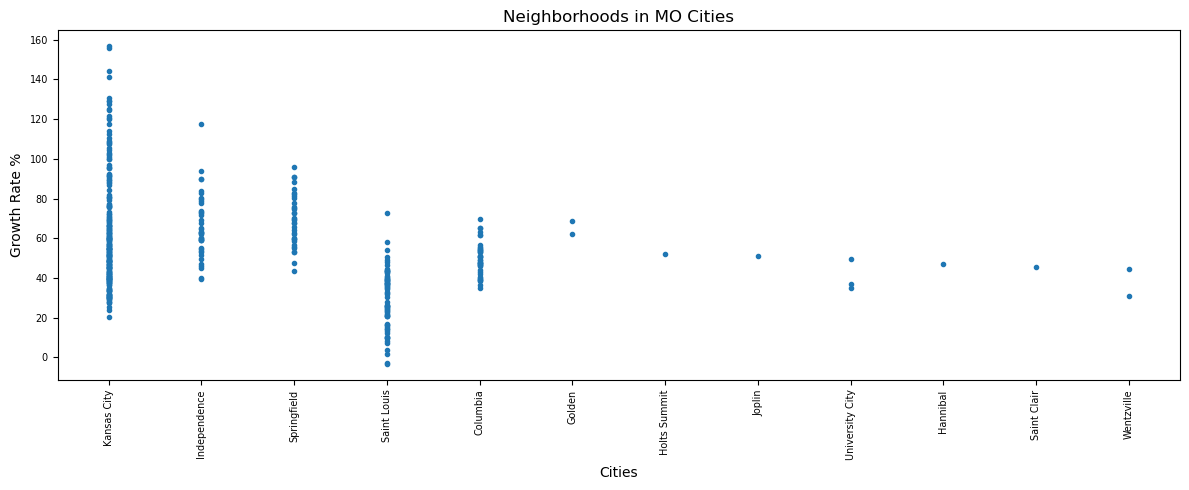

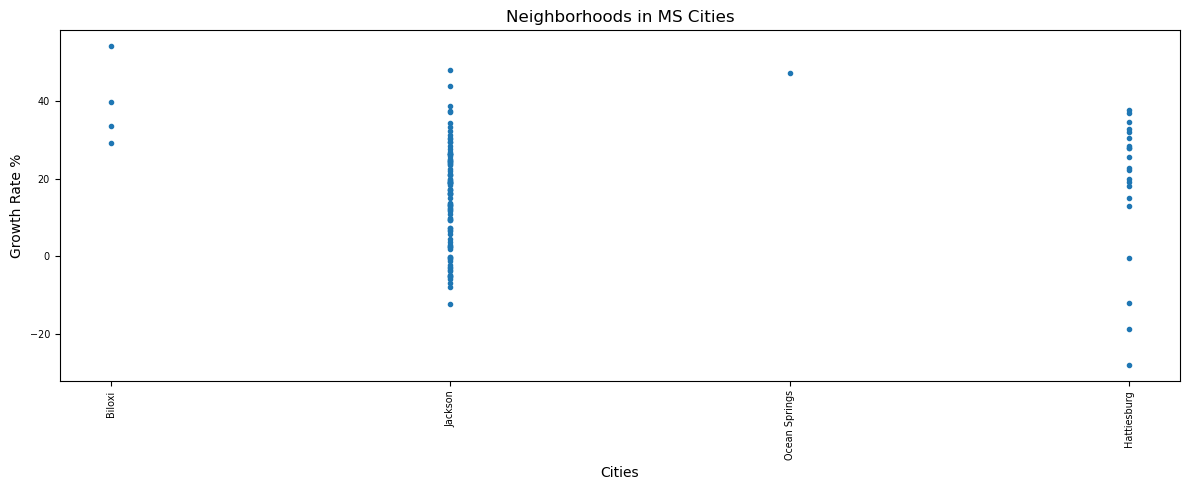

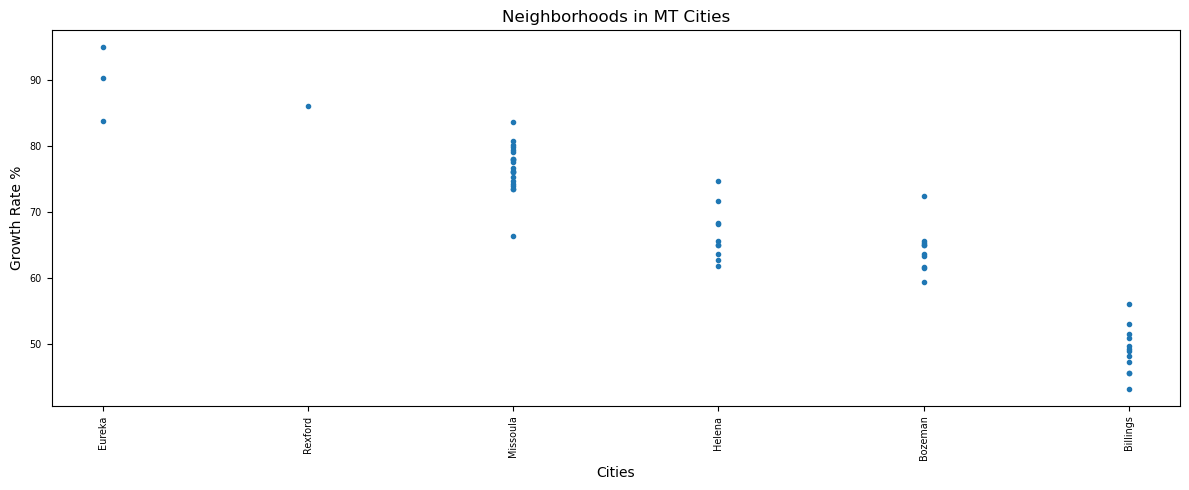

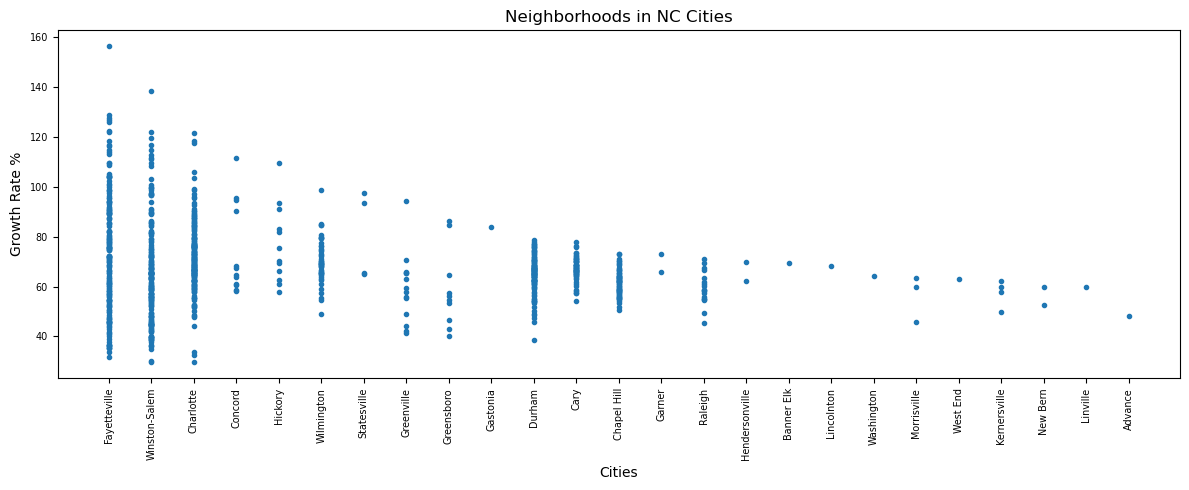

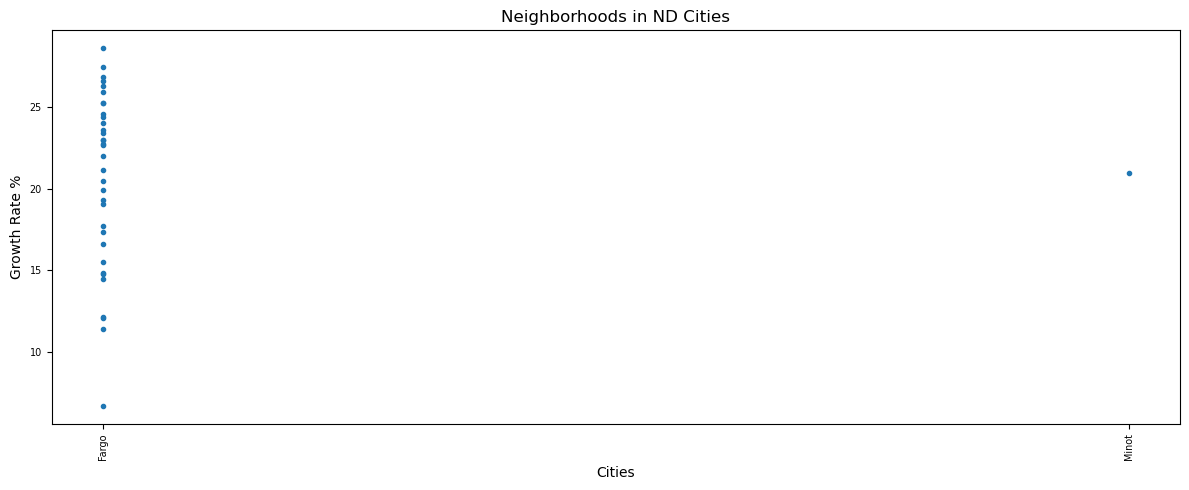

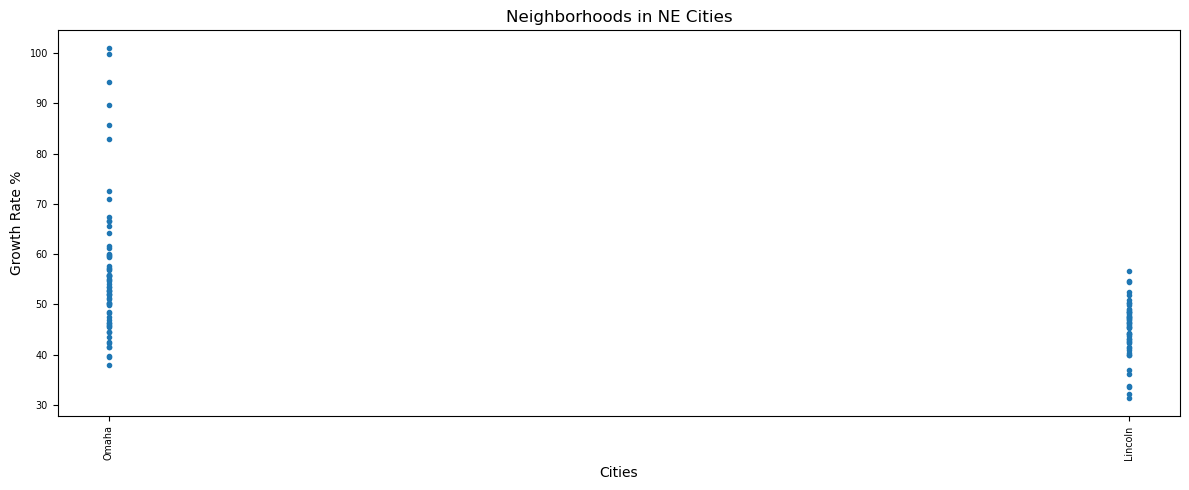

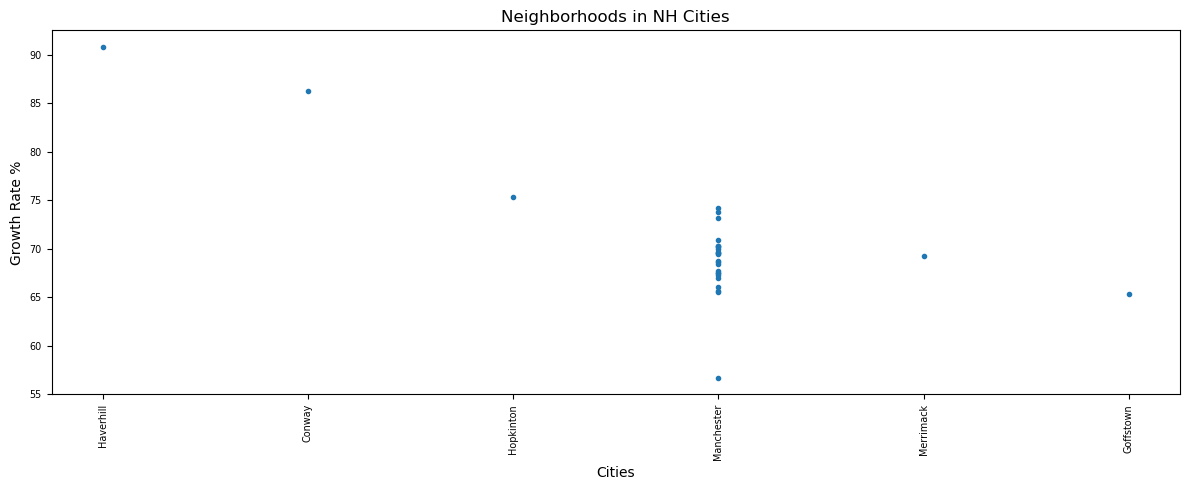

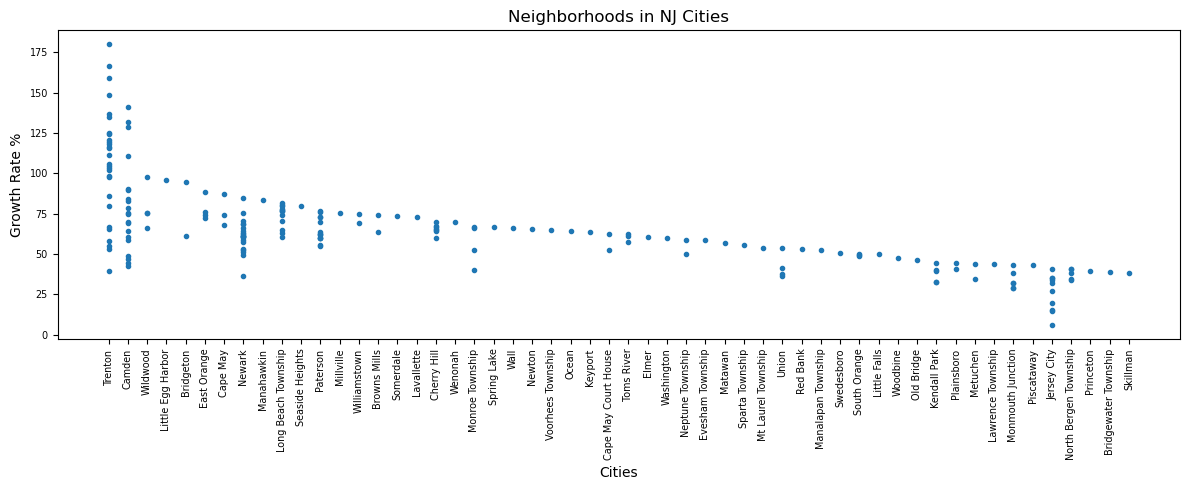

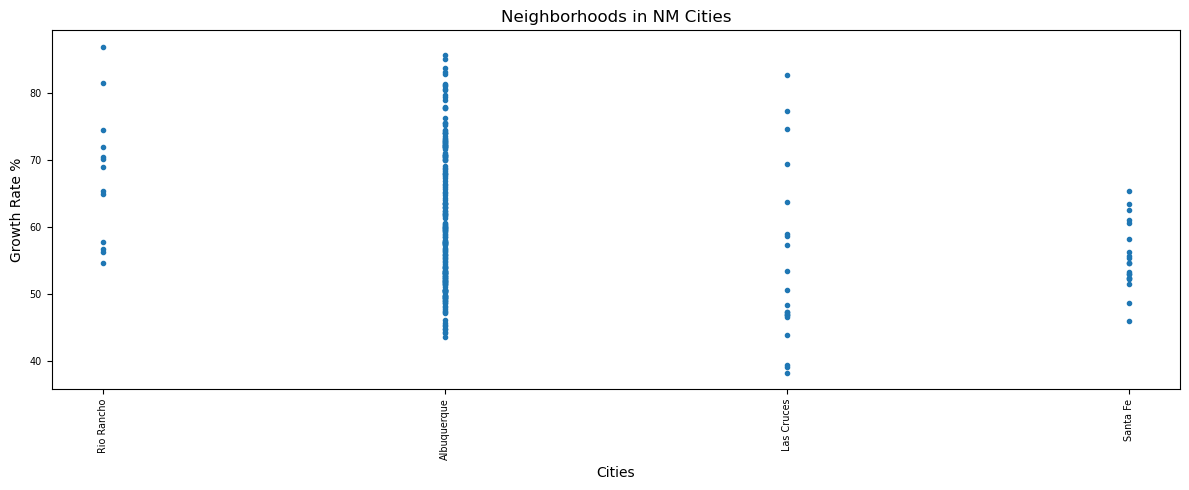

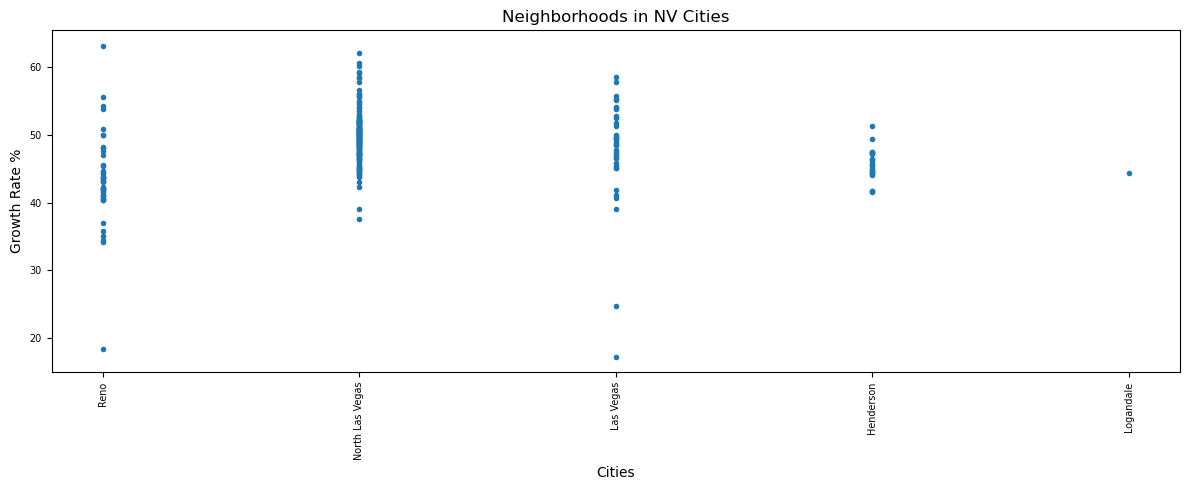

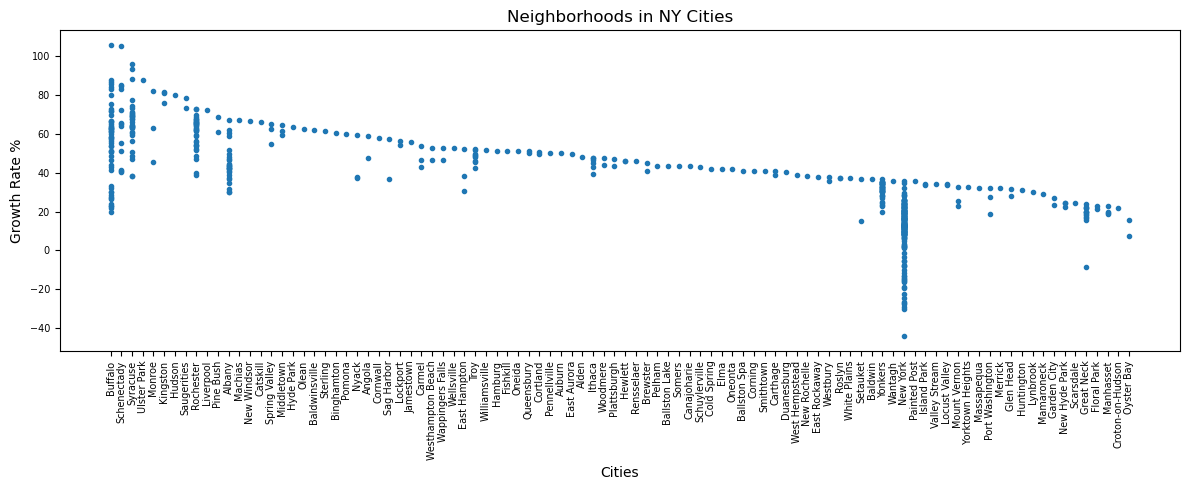

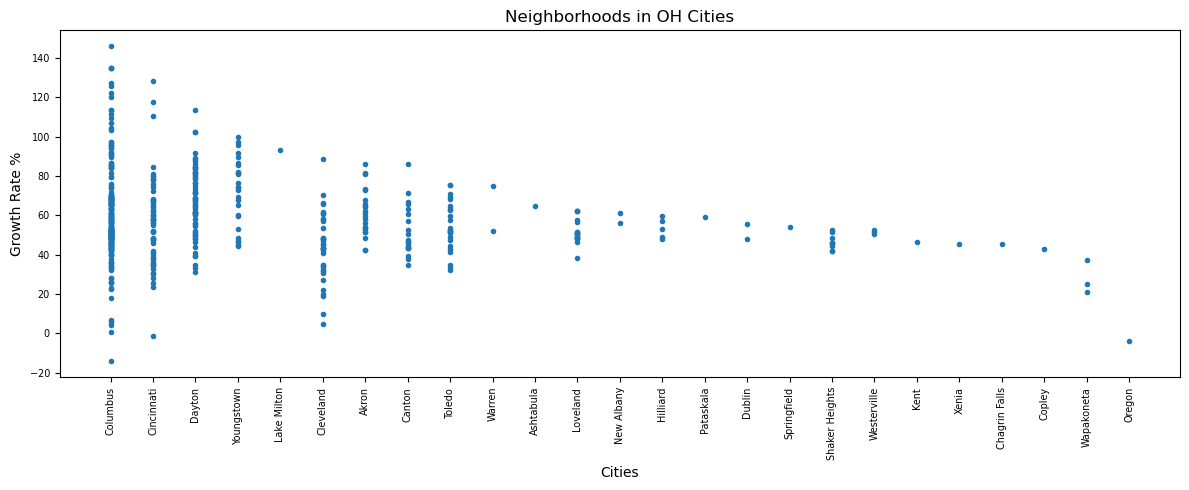

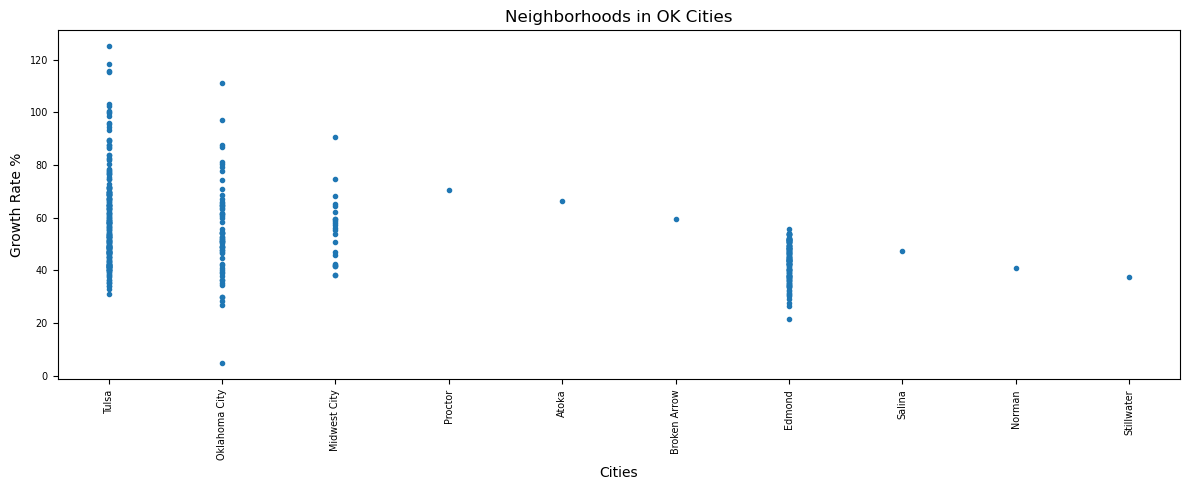

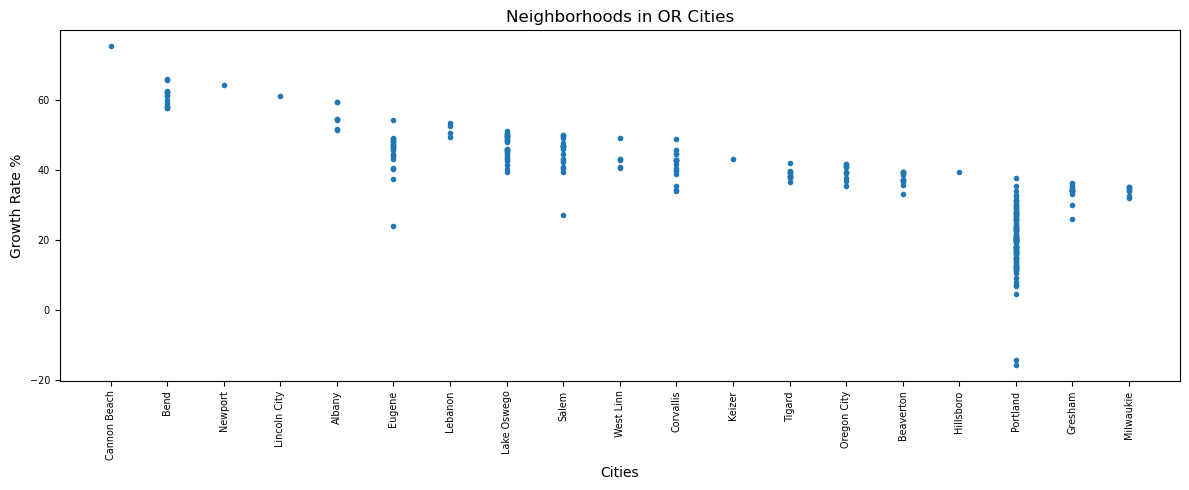

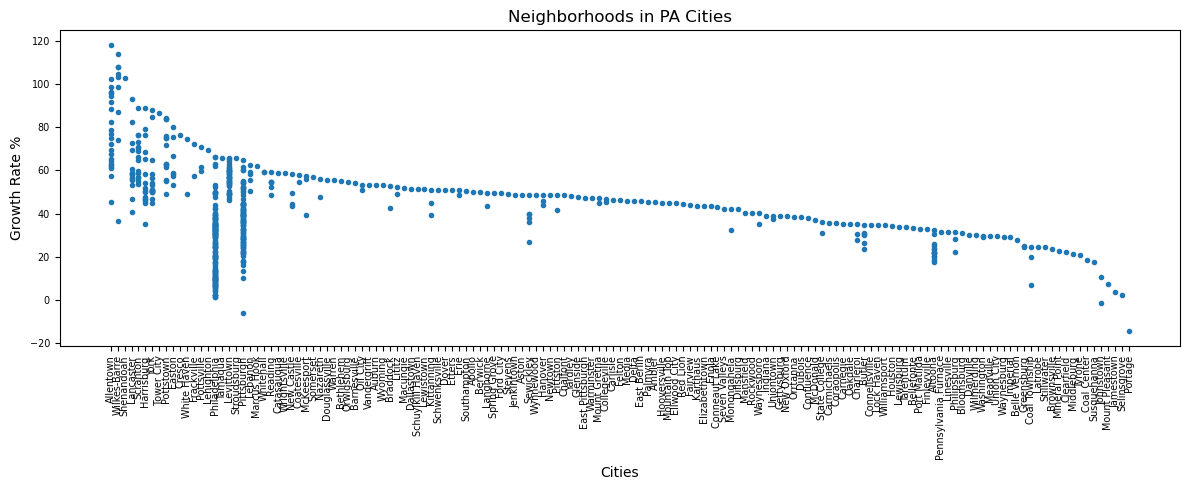

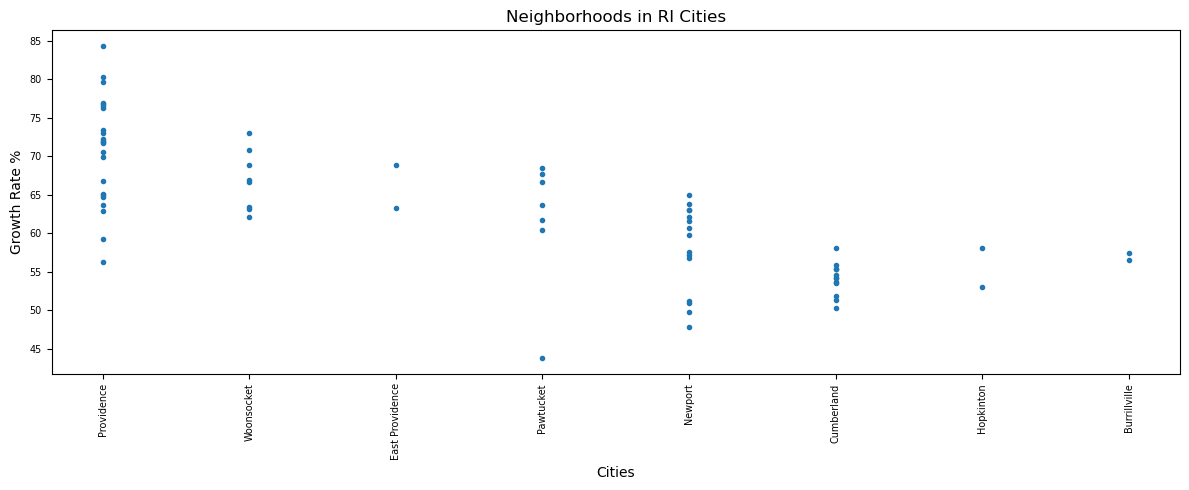

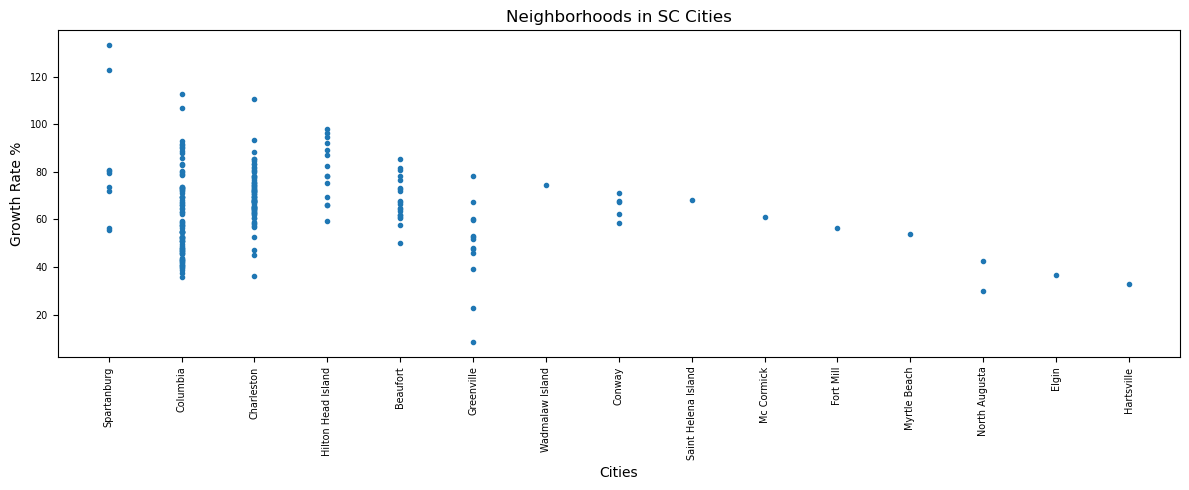

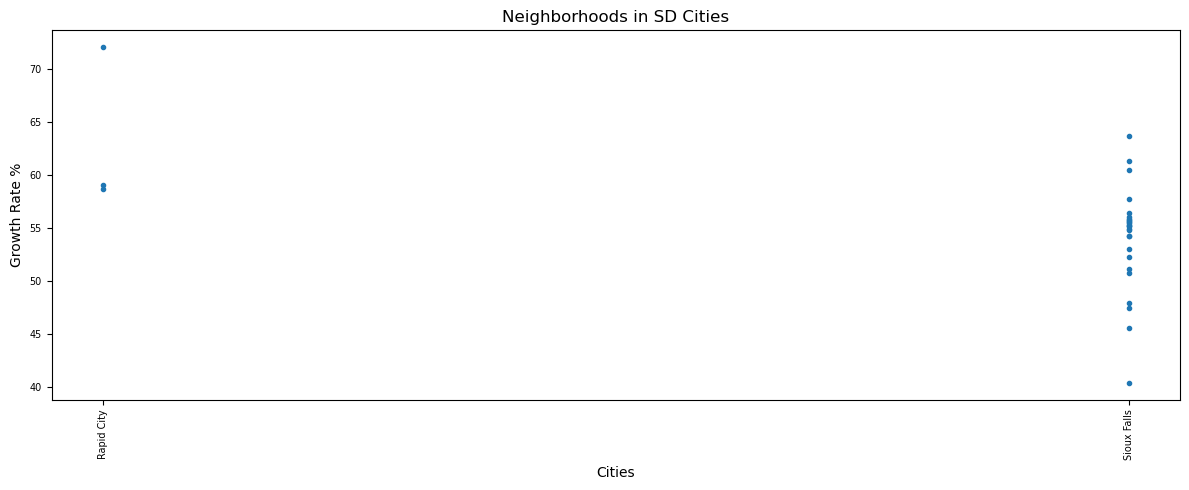

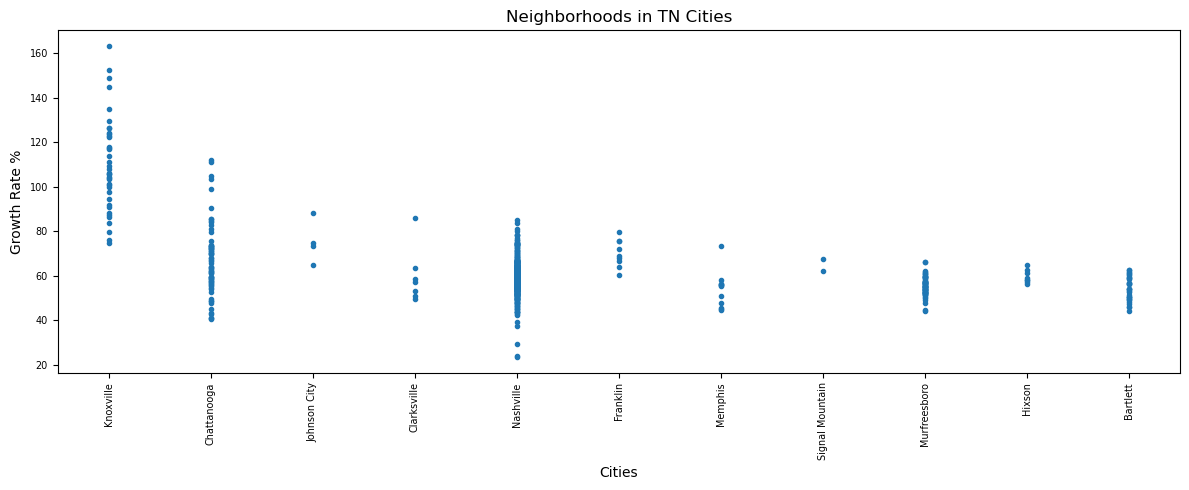

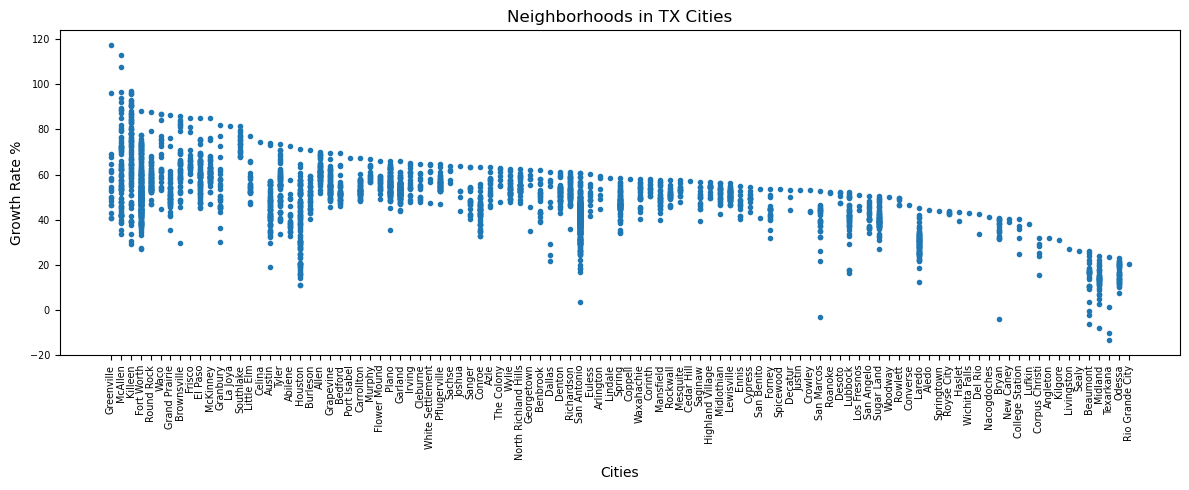

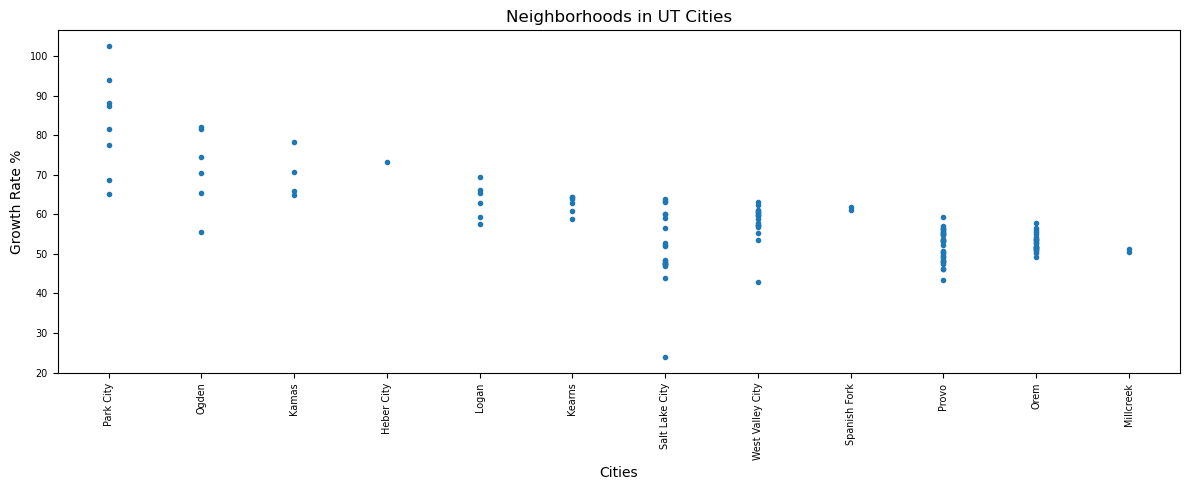

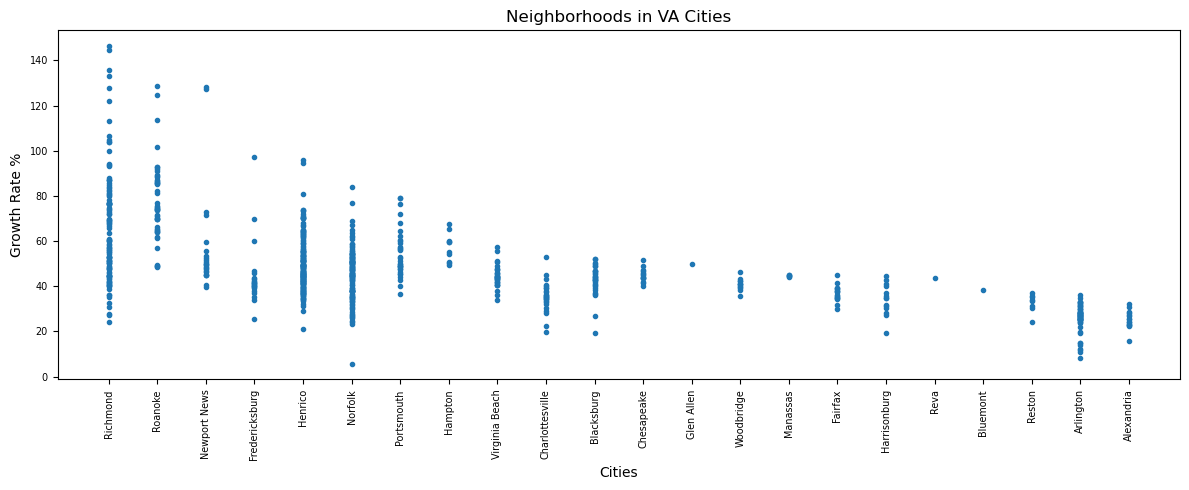

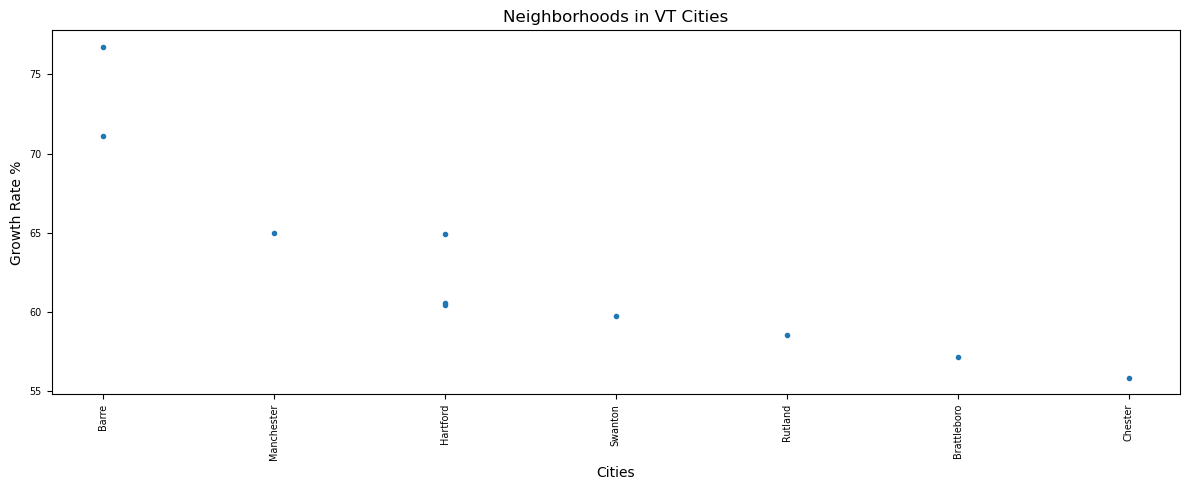

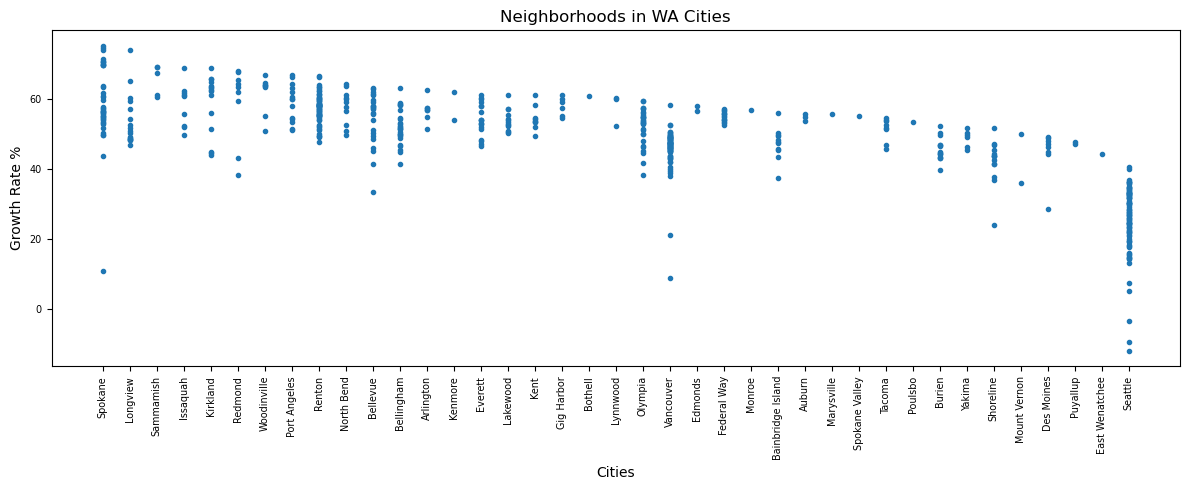

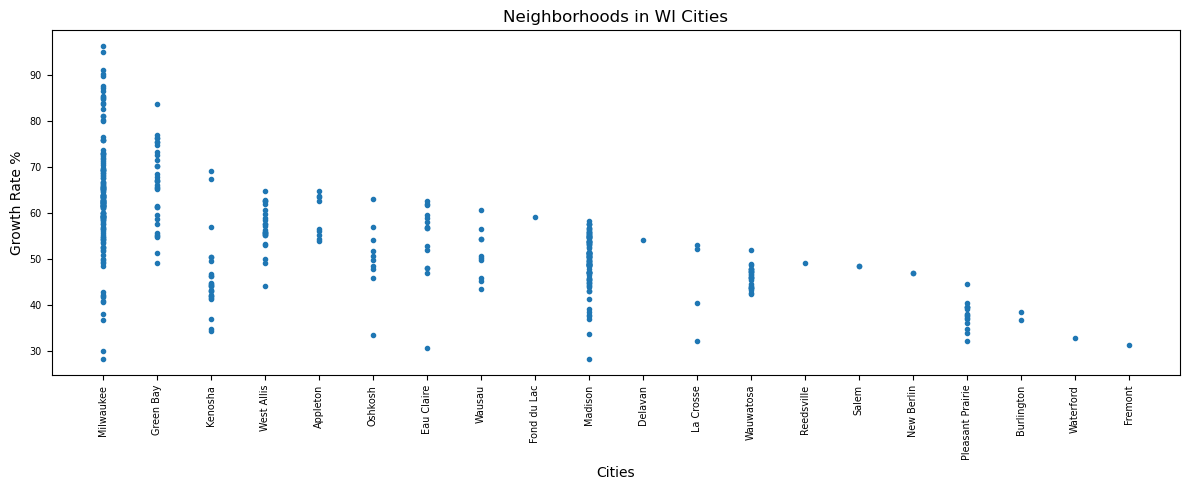

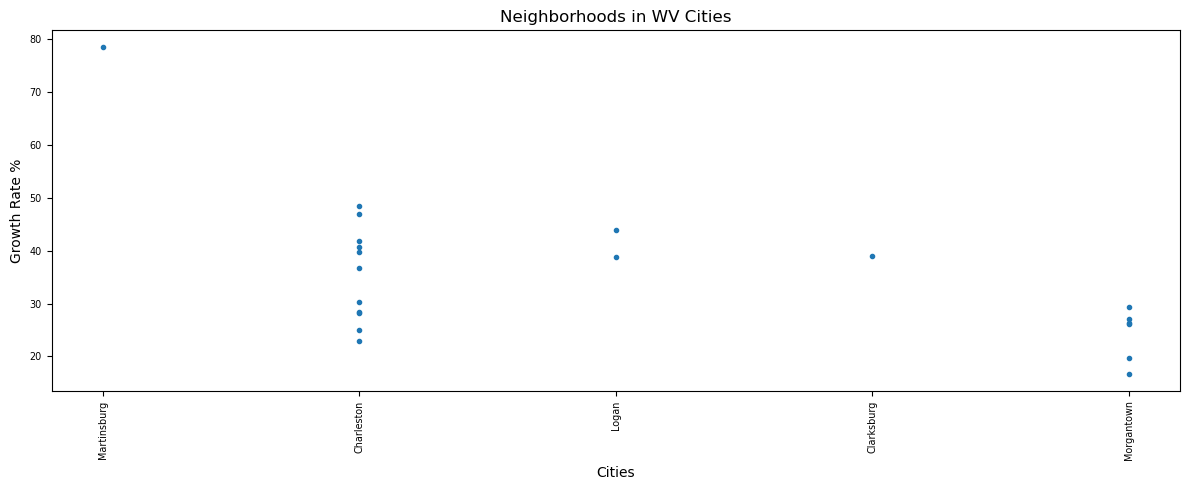

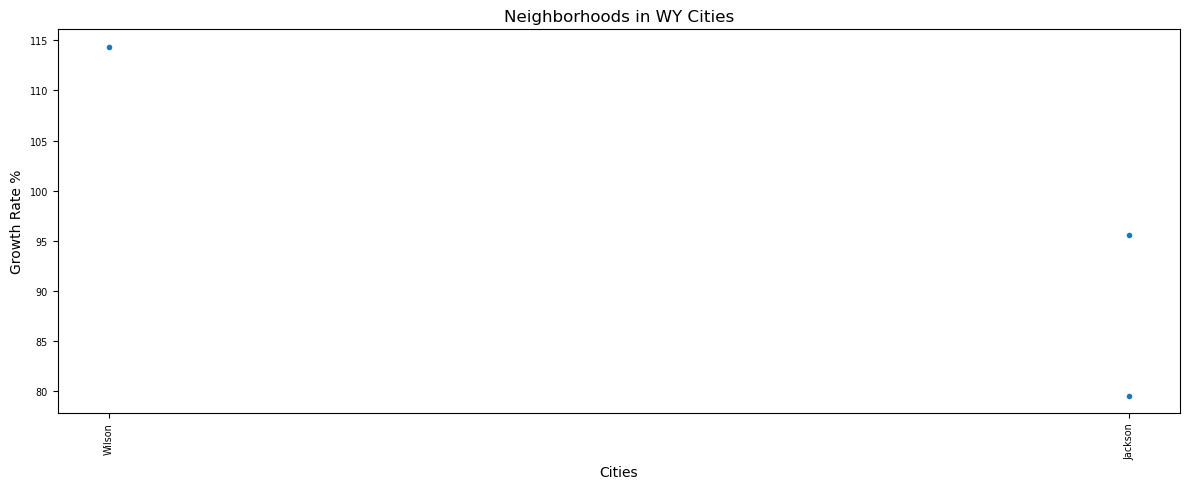

In [52]:
def generate_plots(df):

    statesls = df['State'].tolist()

    uls = []
    for i in statesls:
        if i not in uls:
            uls.append(i)
    uls.sort()
    
    for s in uls:
        sampledf = df.loc[df['State'] == s]
        samplex = sampledf['City']
        sampley = sampledf['Rate of Change 5year']

        fig = plt.figure()
        fig.set_size_inches(12,5)
        plt.scatter( samplex, sampley, marker = 'o', s = 9)

        plt.title(f'Neighborhoods in {s} Cities')
        plt.ylabel("Growth Rate %")
        plt.xlabel("Cities")
        plt.yticks(fontsize='x-small')
        plt.xticks(rotation = 90, fontsize='x-small')

        plt.tight_layout()
        plt.show()

generate_plots(alldf)